Vedant Singh Rathore
<br>Classification & Hypothesis Testing
<br>Course Assignment
<br>Full Code Submission

## Importing necessary libraries and data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For Data Treatment
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, make_scorer
from sklearn import tree

# For tuning the model
from sklearn.model_selection import GridSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

os.chdir('/Users/vedantrathore/VSCode Working Folder/mit_idss/shinka_travel_exp_hackathon/')

In [92]:
train_data_path = os.getcwd()+'/data/train/'
test_data_path = os.getcwd()+'/data/test/'

survey_train = pd.read_csv(train_data_path+'Surveydata_train.csv')
travel_train = pd.read_csv(train_data_path+'Traveldata_train.csv')

survey_test = pd.read_csv(test_data_path+'Surveydata_test.csv')
travel_test = pd.read_csv(test_data_path+'Traveldata_test.csv')

In [93]:
train_df = pd.merge(travel_train, survey_train, on='ID', how='left')
df = train_df.copy()

test_df = pd.merge(travel_test, survey_test, on='ID', how='left')

In [41]:
target_col = 'Overall_Experience'
id_col = 'ID'

## Data Overview

- Observations
- Sanity checks

In [31]:
### First 5 rows
df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [32]:
#### Print Rows and Columns
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 94379
Columns: 25


In [28]:
### Checking info of the data ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

1. No Null Values
2. All Data Types Correct
3. 1 ID column to be dropped before modelling as it doesn't provide any information. **Kept until modelling to keep count of classes**.
4. Target Column: status

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [43]:
type(df.columns)

pandas.core.indexes.base.Index

In [46]:
## Filter Numeric Columns from the dataframe
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
## Drop target columns
numeric_columns.remove(id_col)

columns = list(df.columns)
columns.remove(id_col)

In [37]:
### Summary of Categorical Columns
## df.describe method can be used to print the statistical summary of the data
## include='object' argument provides the summary for ordinal columns
df.describe(include='object').T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835


In [38]:
### Summary of Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


**Univariate Analysis**

In [39]:
## Create a univariate analysis function that takes the dataframe, the column to be analyzed and a flag to check if the column is an id column
## This function can be used to analyze all the columns in the data without rewriting any piece of plotting code
def uni_analyze(df,col,id_col=False):
  print("-"*300)
  print(f'\nUnivariate Analysis of {col}\n')
  """Check if the given column is an id column"""
  if id_col==False:
    """If not an id column, check if the column is of 'object' dtype"""
    if df[col].dtype=='object':
      """Print the value counts for the column"""
      print(f'Unique Set of Values for {col}:\n{df[col].value_counts()}\n')
      plt.figure(figsize = (15,5))
      """If the number of unique entries in the column is less than 20, Plot the countplot"""
      """Too many unique values will lead to crowding of the plot"""
      if df[col].nunique()<20:
        fig = sns.countplot(data = df, x = col)
        for patch in fig.patches:
          label = patch.get_height()
          x = patch.get_x() + patch.get_width() / 2  # width of the plot
          y = patch.get_height()
          fig.annotate(label,(x,y))
      else:
        print('\nToo many distinct variables to be plotted on a countplot!!')
      plt.show()

    else:
      """If not an 'object' column, i.e. for numeric columns"""
      """Print the Mean, Median, Min, Max and Skew of the column"""
      print(f'Stats for the column {col}:\n Mean: {df[col].mean()}\n Min: {df[col].min()}\n Max: {df[col].max()}\n Median: {df[col].median()}\n Skew: {df[col].skew()}\n')

      f, (hist_plot, box_plot) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.75, 0.25)},
        figsize=(15,5)
      )
      """Subplot Histogram of the column"""
      sns.histplot(data=df,x=col, ax=hist_plot, kde=False) ## Histogram
      """Plot the boxplot of the column"""
      sns.boxplot(data=df,x=col, ax=box_plot) ## Boxplot
      """Add Mean to histogram"""
      hist_plot.axvline(df[col].mean())
      """Add Median to histplot"""
      hist_plot.axvline(df[col].mean())
      f.suptitle(f'Boxplot & Histogram for {col}')
      plt.show()

  else:
    """If an ID column, show the total number of unique counts in the column and print sample data"""
    print(f'Unique Values for {col}:\n{df[col].nunique()}')
    print(f'\n Sample data\n')
    print(df[col].head())

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Gender

Unique Set of Values for Gender:
Gender
Female    47815
Male      46487
Name: count, dtype: int64



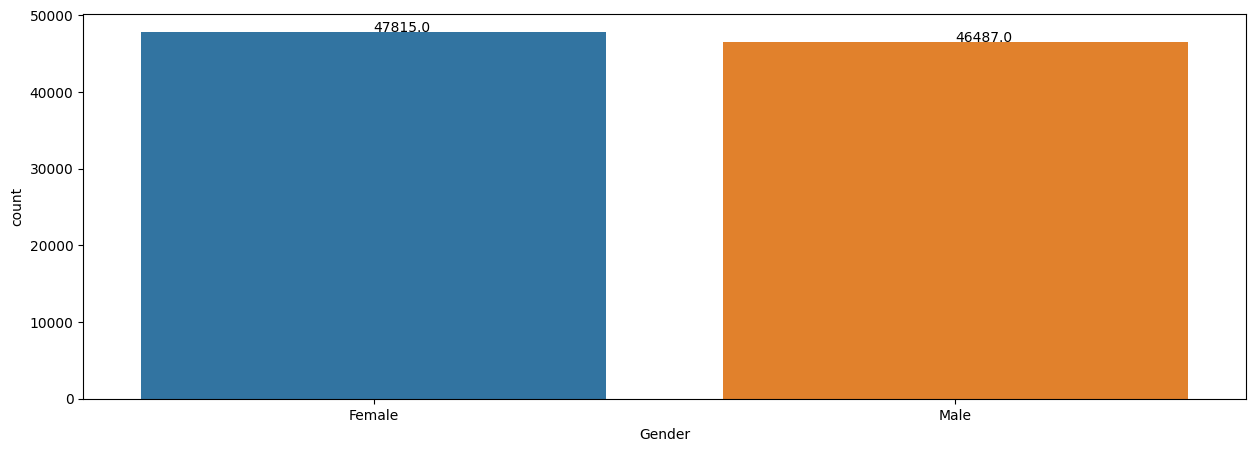

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Customer_Type

Unique Set of Values for Customer_Type:
Customer_Type
Loyal Customer       69823
Disloyal Customer    15605
Name: count, dtype: int64



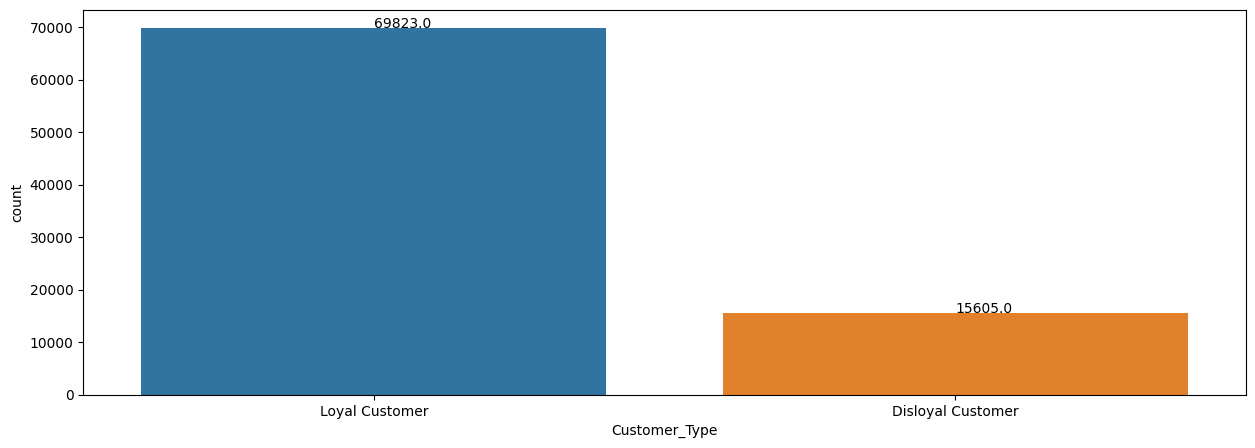

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Type_Travel

Unique Set of Values for Type_Travel:
Type_Travel
Business Travel    58617
Personal Travel    26536
Name: count, dtype: int64



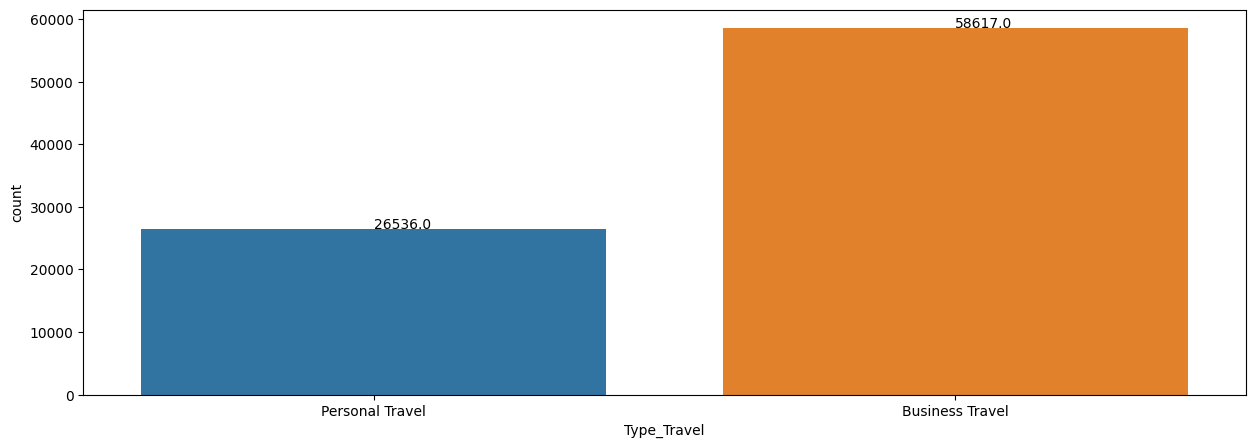

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Travel_Class

Unique Set of Values for Travel_Class:
Travel_Class
Eco         49342
Business    45037
Name: count, dtype: int64



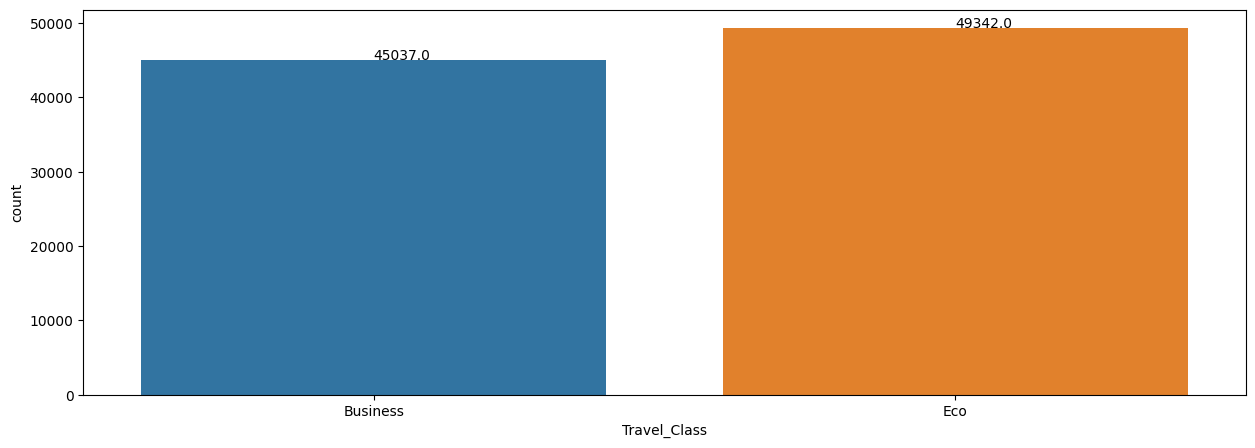

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Seat_Comfort

Unique Set of Values for Seat_Comfort:
Seat_Comfort
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: count, dtype: int64



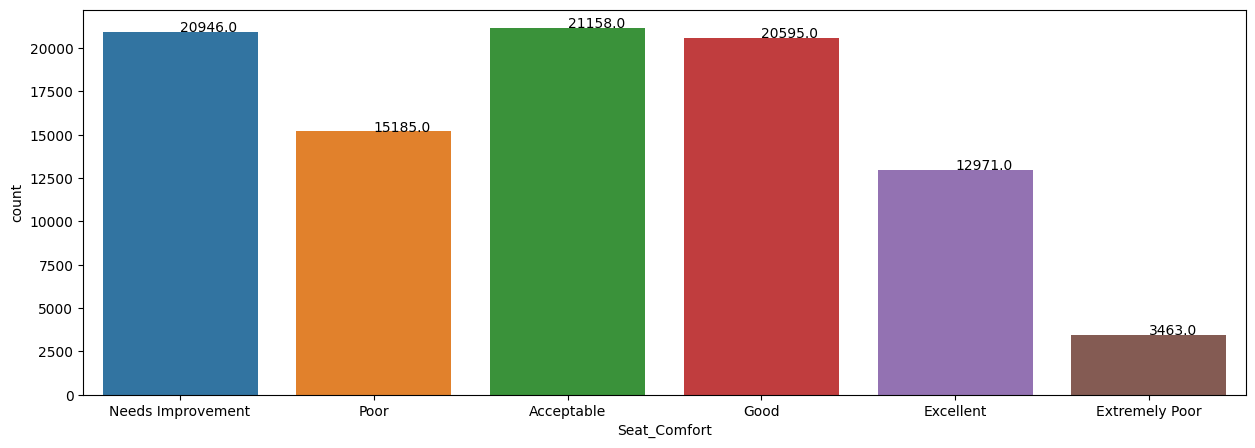

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Seat_Class

Unique Set of Values for Seat_Class:
Seat_Class
Green Car    47435
Ordinary     46944
Name: count, dtype: int64



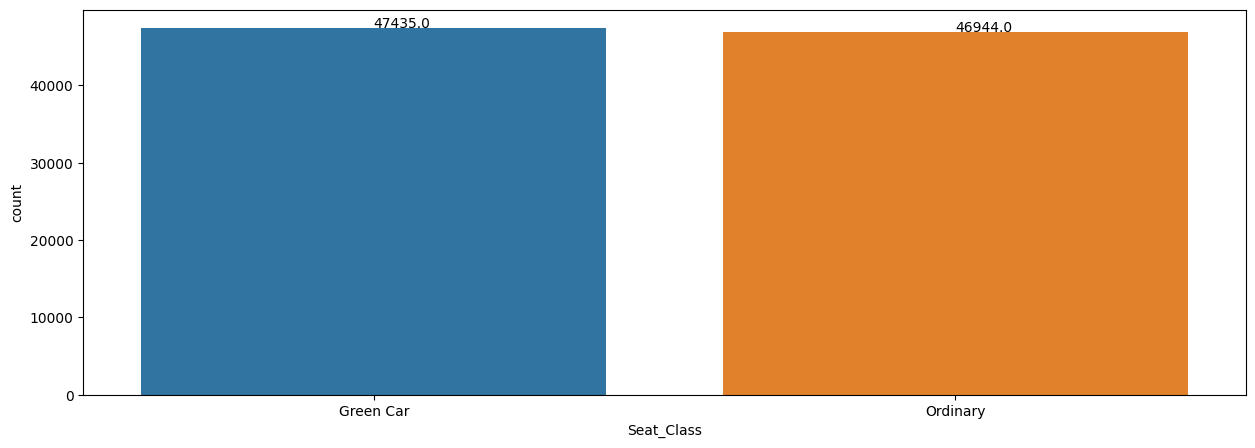

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Arrival_Time_Convenient

Unique Set of Values for Arrival_Time_Convenient:
Arrival_Time_Convenient
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: count, dtype: int64



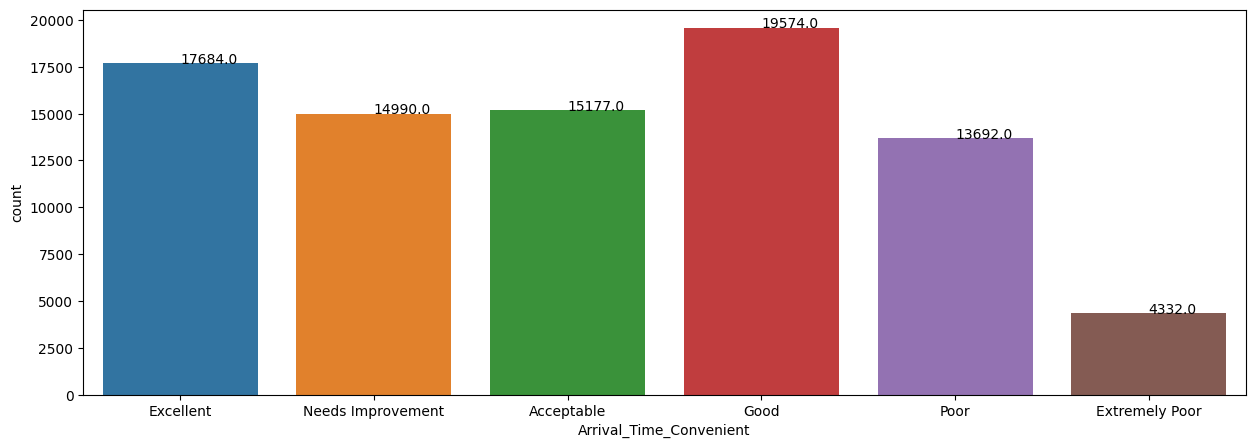

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Catering

Unique Set of Values for Catering:
Catering
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: count, dtype: int64



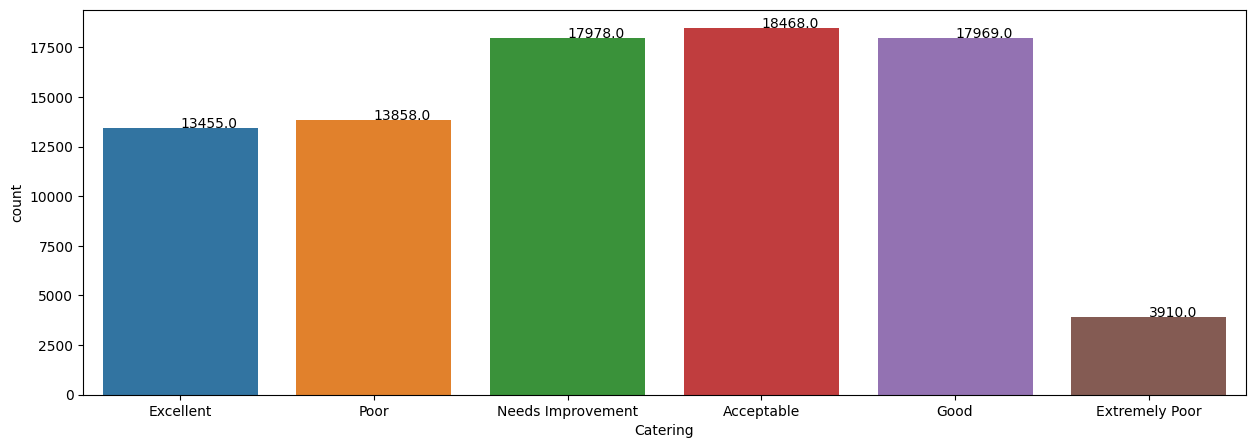

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Platform_Location

Unique Set of Values for Platform_Location:
Platform_Location
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981
Very Inconvenient        2
Name: count, dtype: int64



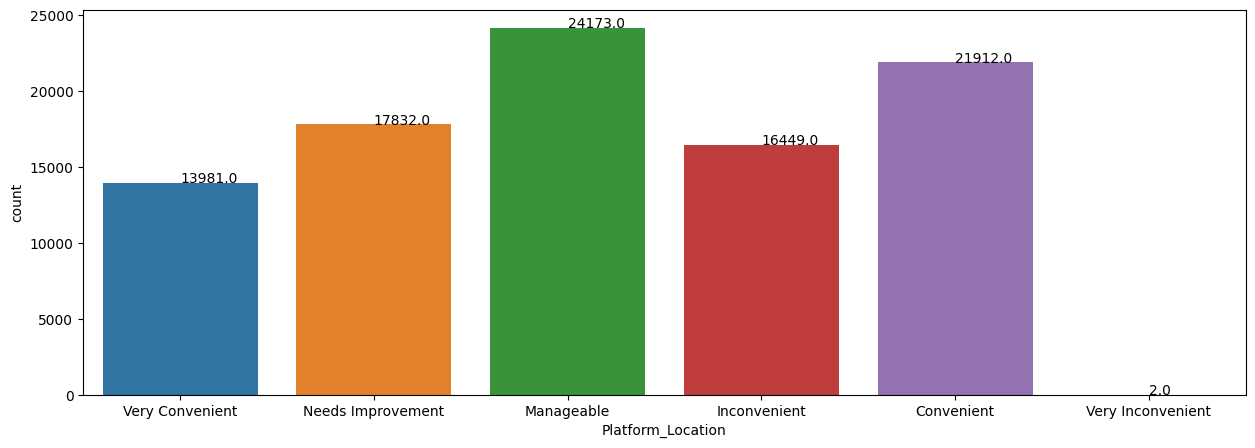

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Onboard_Wifi_Service

Unique Set of Values for Onboard_Wifi_Service:
Onboard_Wifi_Service
Good                 22835
Excellent            20968
Acceptable           20118
Needs Improvement    19596
Poor                 10741
Extremely Poor          91
Name: count, dtype: int64



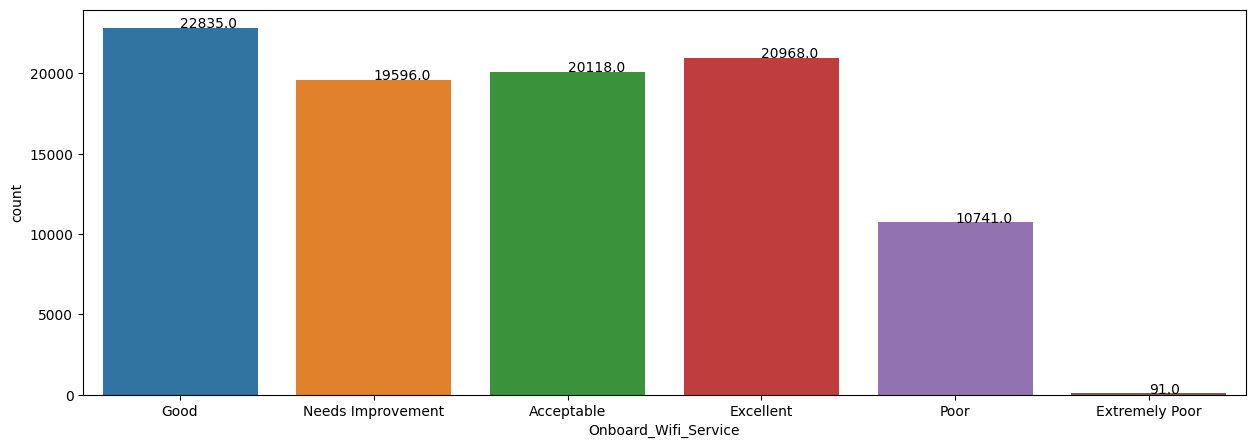

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Onboard_Entertainment

Unique Set of Values for Onboard_Entertainment:
Onboard_Entertainment
Good                 30446
Excellent            21644
Acceptable           17560
Needs Improvement    13926
Poor                  8641
Extremely Poor        2144
Name: count, dtype: int64



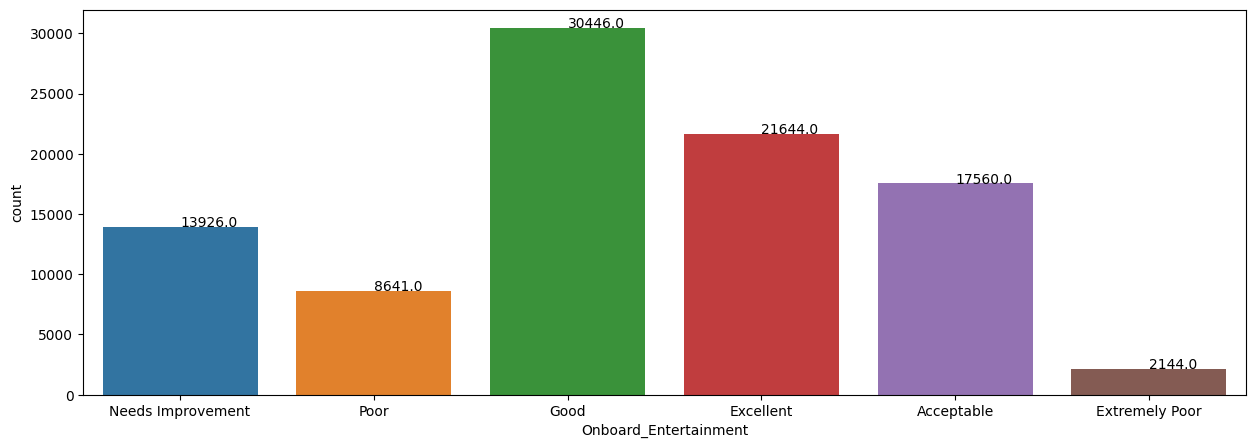

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Online_Support

Unique Set of Values for Online_Support:
Online_Support
Good                 30016
Excellent            25894
Acceptable           15702
Needs Improvement    12508
Poor                 10167
Extremely Poor           1
Name: count, dtype: int64



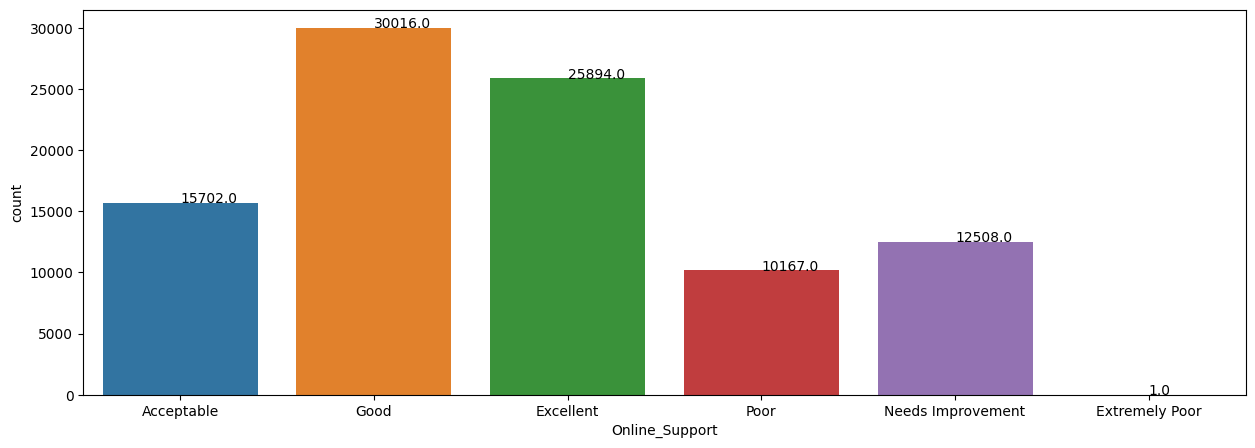

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Ease_of_Online_Booking

Unique Set of Values for Ease_of_Online_Booking:
Ease_of_Online_Booking
Good                 28909
Excellent            24744
Acceptable           16390
Needs Improvement    14479
Poor                  9768
Extremely Poor          16
Name: count, dtype: int64



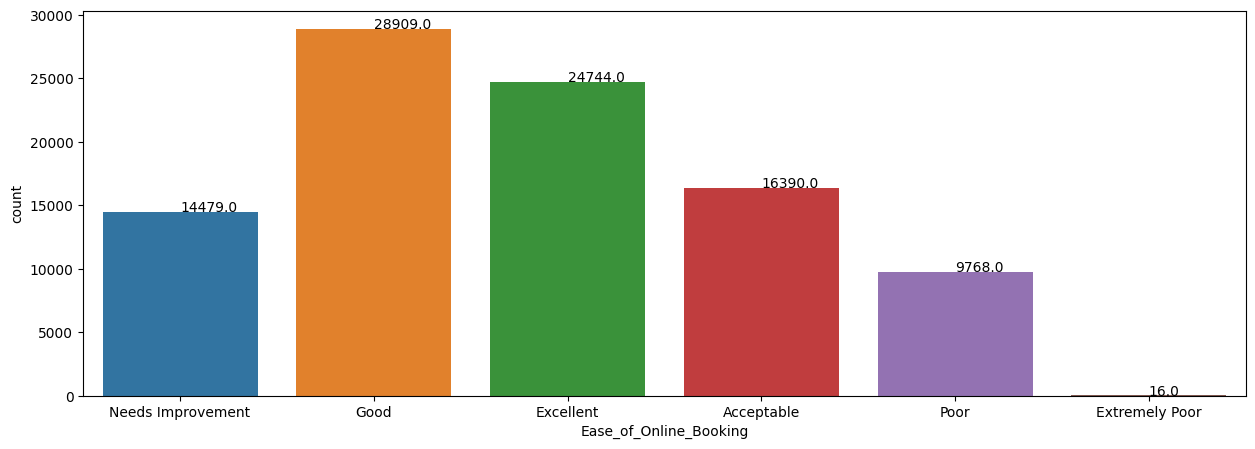

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Onboard_Service

Unique Set of Values for Onboard_Service:
Onboard_Service
Good                 27265
Excellent            21272
Acceptable           18071
Needs Improvement    11390
Poor                  8776
Extremely Poor           4
Name: count, dtype: int64



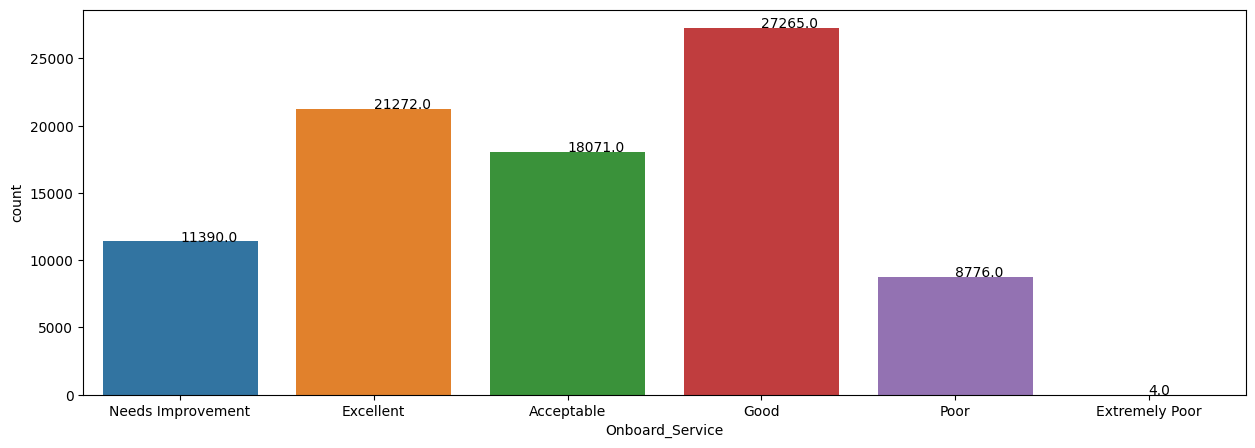

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Legroom

Unique Set of Values for Legroom:
Legroom
Good                 28870
Excellent            24832
Acceptable           16384
Needs Improvement    15753
Poor                  8110
Extremely Poor         340
Name: count, dtype: int64



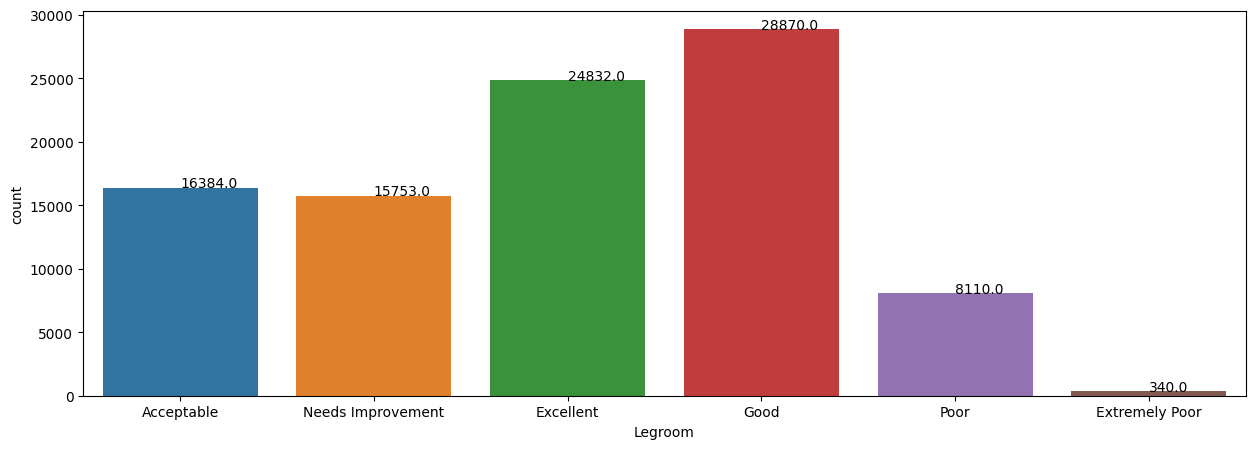

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Baggage_Handling

Unique Set of Values for Baggage_Handling:
Baggage_Handling
Good                 34944
Excellent            26003
Acceptable           17767
Needs Improvement     9759
Poor                  5764
Name: count, dtype: int64



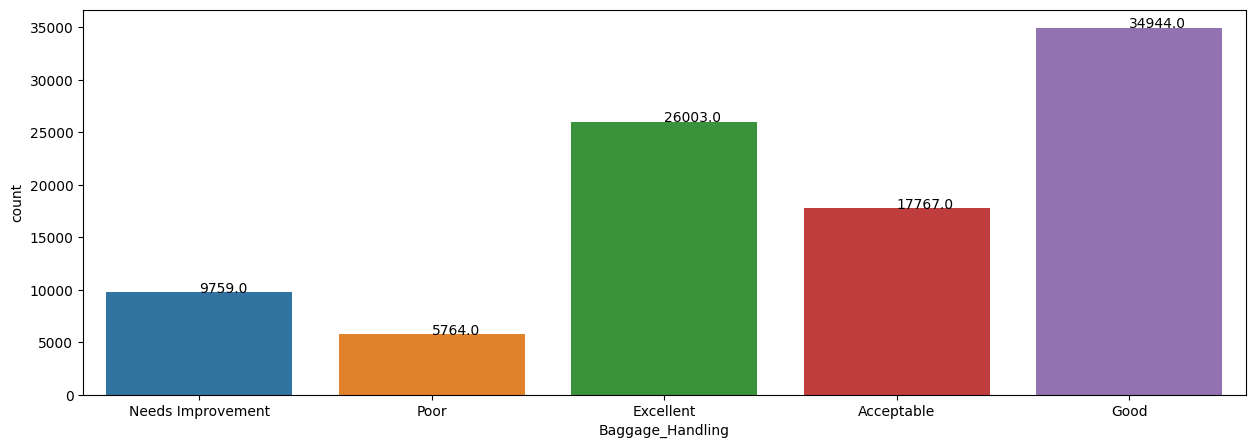

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of CheckIn_Service

Unique Set of Values for CheckIn_Service:
CheckIn_Service
Good                 26502
Acceptable           25803
Excellent            19641
Needs Improvement    11218
Poor                 11137
Extremely Poor           1
Name: count, dtype: int64



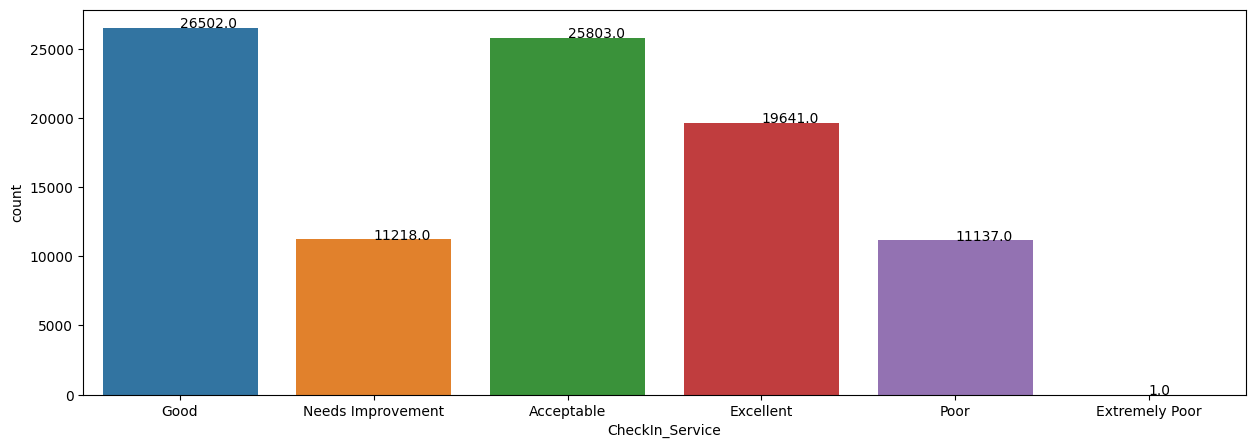

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Cleanliness

Unique Set of Values for Cleanliness:
Cleanliness
Good                 35427
Excellent            26053
Acceptable           17449
Needs Improvement     9806
Poor                  5633
Extremely Poor           5
Name: count, dtype: int64



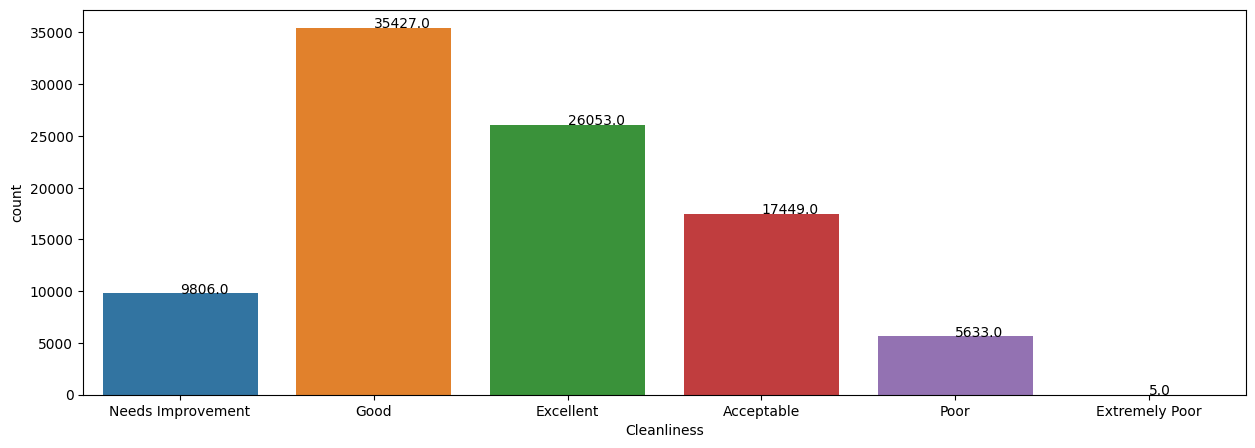

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Online_Boarding

Unique Set of Values for Online_Boarding:
Online_Boarding
Good                 25533
Acceptable           22475
Excellent            21742
Needs Improvement    13451
Poor                 11160
Extremely Poor          12
Name: count, dtype: int64



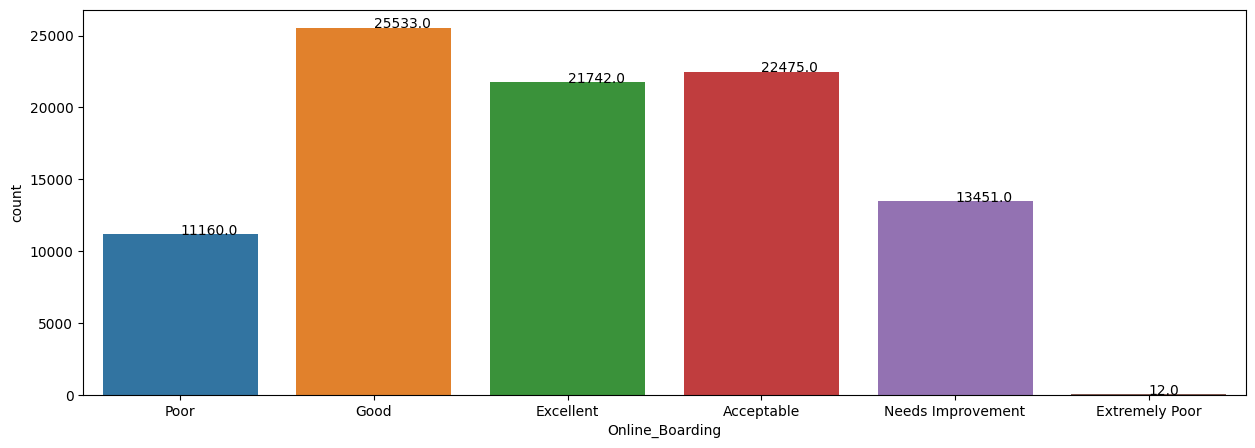

In [47]:
## To Analyze All Columns in a single output block
## Creating an analyze function helps iterate over the df.columns list and print all outputs in one output block
for column in categorical_columns:
  uni_analyze(df,column)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Age

Stats for the column Age:
 Mean: 39.41964683187417
 Min: 7.0
 Max: 85.0
 Median: 40.0
 Skew: -0.00238668733944647



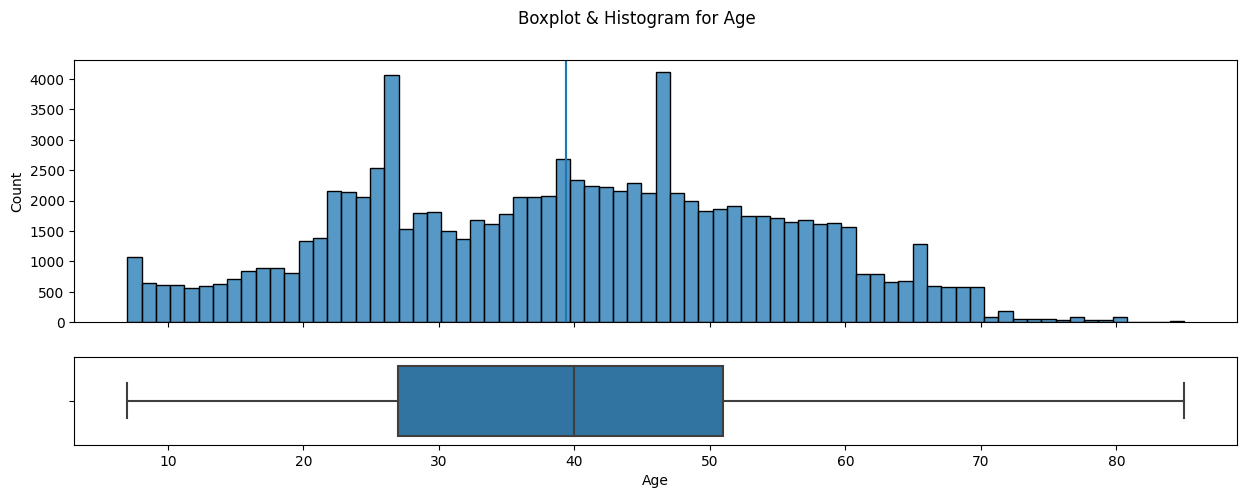

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Travel_Distance

Stats for the column Travel_Distance:
 Mean: 1978.8881848716346
 Min: 50
 Max: 6951
 Median: 1923.0
 Skew: 0.4730578422467755



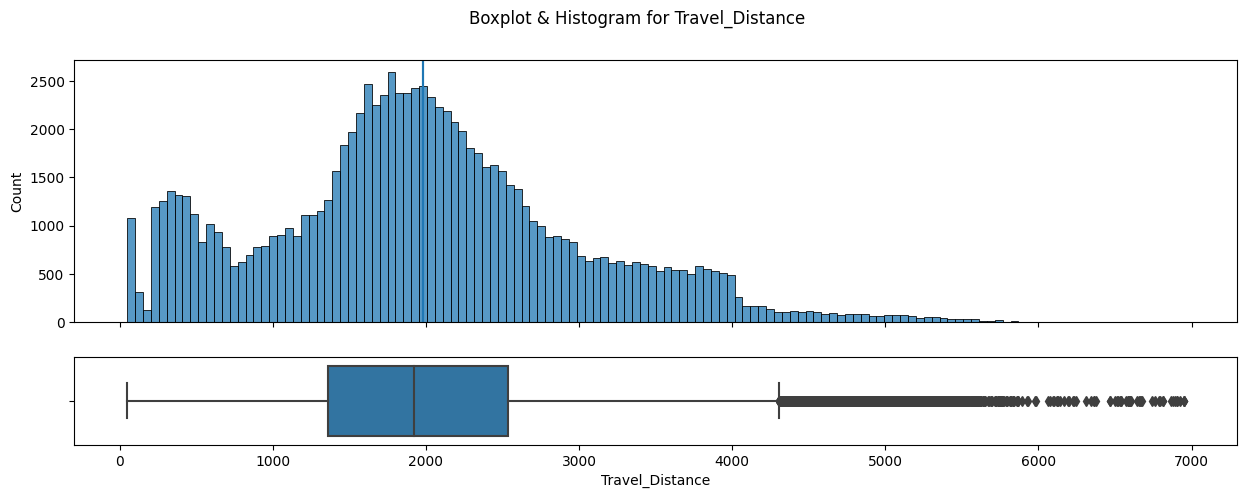

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Departure_Delay_in_Mins

Stats for the column Departure_Delay_in_Mins:
 Mean: 14.647091876762579
 Min: 0.0
 Max: 1592.0
 Median: 0.0
 Skew: 7.15680293332336



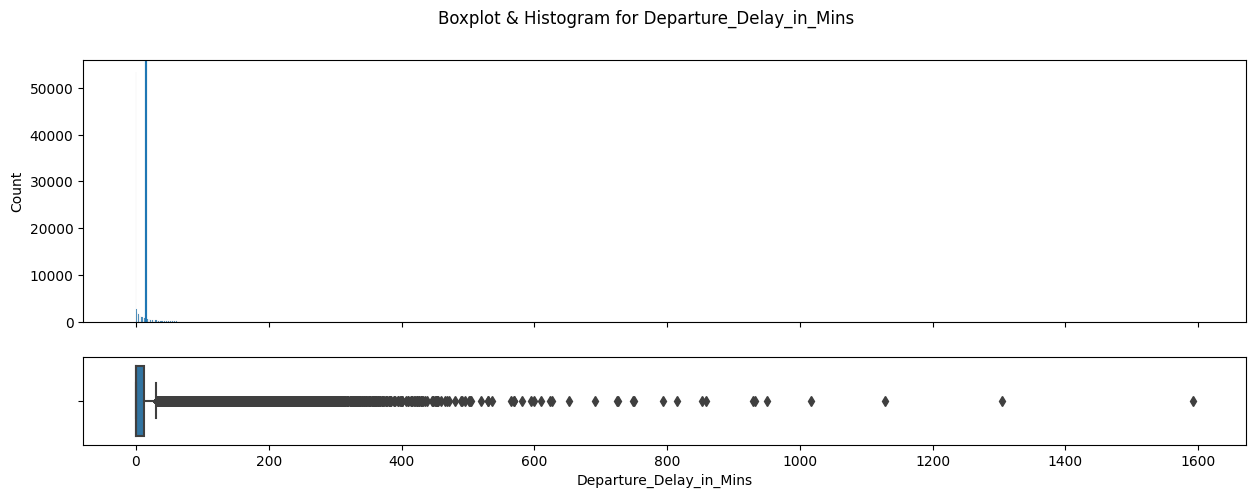

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Arrival_Delay_in_Mins

Stats for the column Arrival_Delay_in_Mins:
 Mean: 15.0052221820425
 Min: 0.0
 Max: 1584.0
 Median: 0.0
 Skew: 6.979684902823719



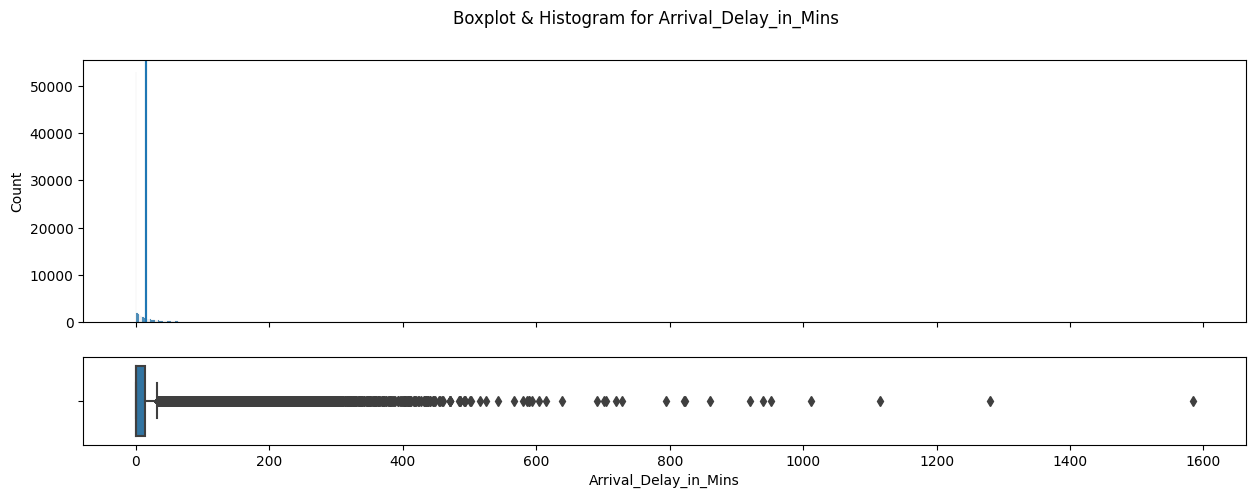

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Univariate Analysis of Overall_Experience

Stats for the column Overall_Experience:
 Mean: 0.5466576251072802
 Min: 0
 Max: 1
 Median: 1.0
 Skew: -0.18745138973393272



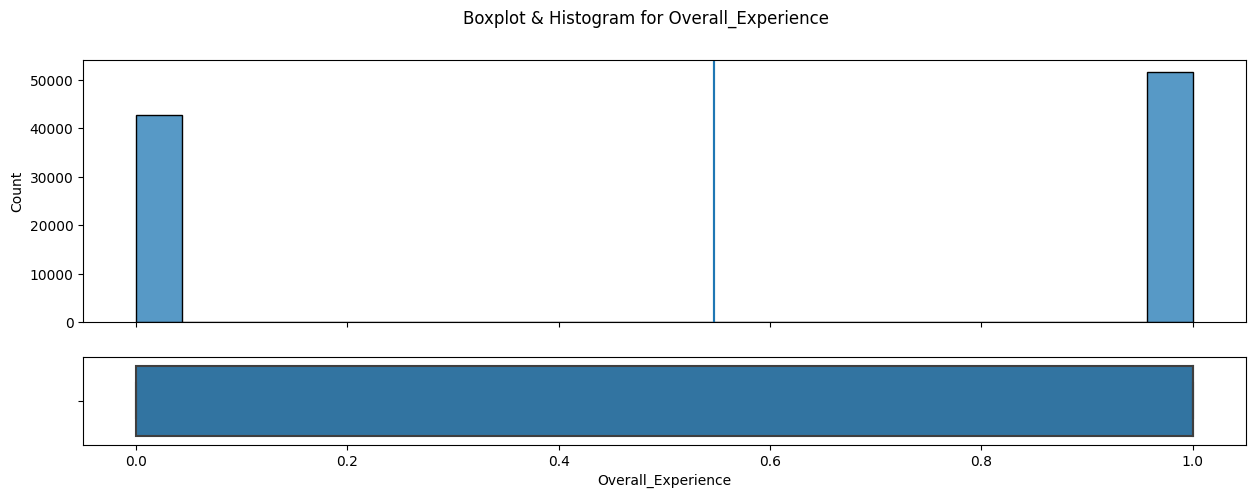

In [48]:
## To Analyze All Columns in a single output block
## Creating an analyze function helps iterate over the df.columns list and print all outputs in one output block
for column in numeric_columns:
  uni_analyze(df,column)

Univariate Analysis Observations: <br>
1. 

**Multivariate Analysis**

In [49]:
## Barplots and distplots are some of the best plots for multivariate analysis
### Distribution Plot
def distribution_plot(data, predictor, target):

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

    target_uniq = data[target].unique()

    axs[0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0],
        color="teal",
        stat="density",
    )

    axs[1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[1],
        color="orange",
        stat="density",
    )

    plt.show()
### Bar Plot
def bar_plot(df,feature, target):
    plt.figure(figsize=(15,7))
    ## Get feature wise percentage split of converting and non-converting
    plot_df = pd.crosstab(df[feature], df[target]).sort_values(by=df[target].value_counts().index[-1], ascending=False)
    plot_df.plot(kind="bar", stacked=True)
    plt.xticks(rotation = 60)
    plt.show()

## Create a dataframe to observe the conversion rate basis given column
def check_conversion_split(df,col,target):
  temp_df = df.groupby([col,target]).agg({'ID':'count'}).reset_index()
  temp_df = temp_df.pivot(index=col, columns=target, values='ID').reset_index()
  temp_df['conversion_rate'] = temp_df[1]*100/(temp_df[0]+temp_df[1])
  return temp_df

## This functions take the dataframe and the feature & target columns as input and outputs the stacked barplot and distribution plots
## Rather than rewriting the code for each pair of variables, this function can be reused with different col_list to get desired output
def multi_analyze(df,feature, target):
  bar_plot(df,feature, target)
  print("-"*300)
  distribution_plot(data=df,predictor=feature,target=target)
  check_conversion_split(df,feature,target)

**Correlation Matrix**

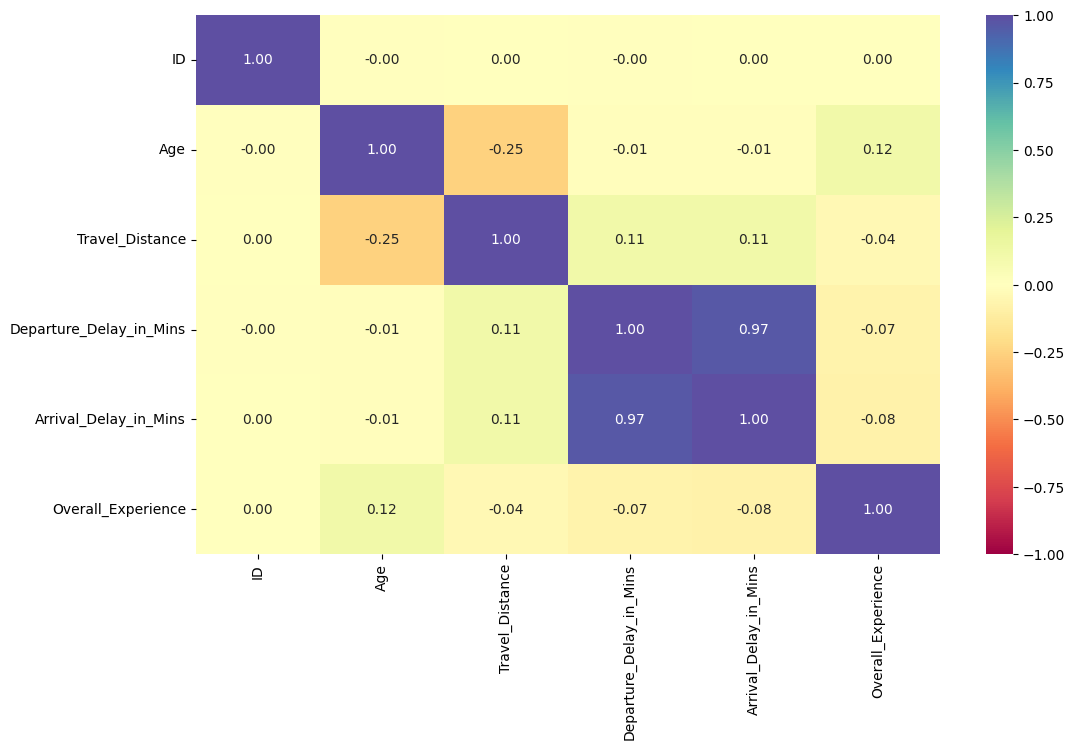

In [50]:
## Plot Correlation Matrix
corr_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[corr_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [51]:
columns

['Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Travel_Class',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

<Figure size 1500x700 with 0 Axes>

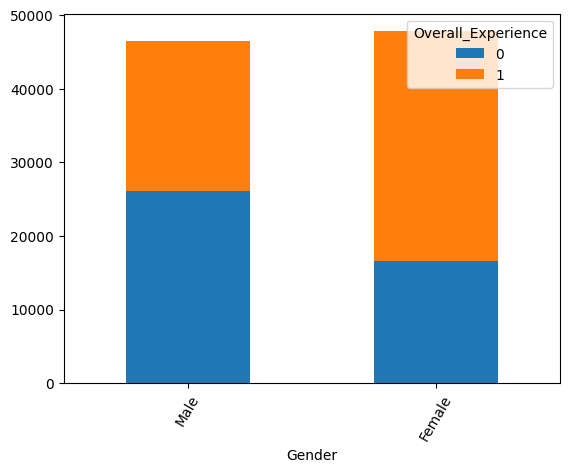

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


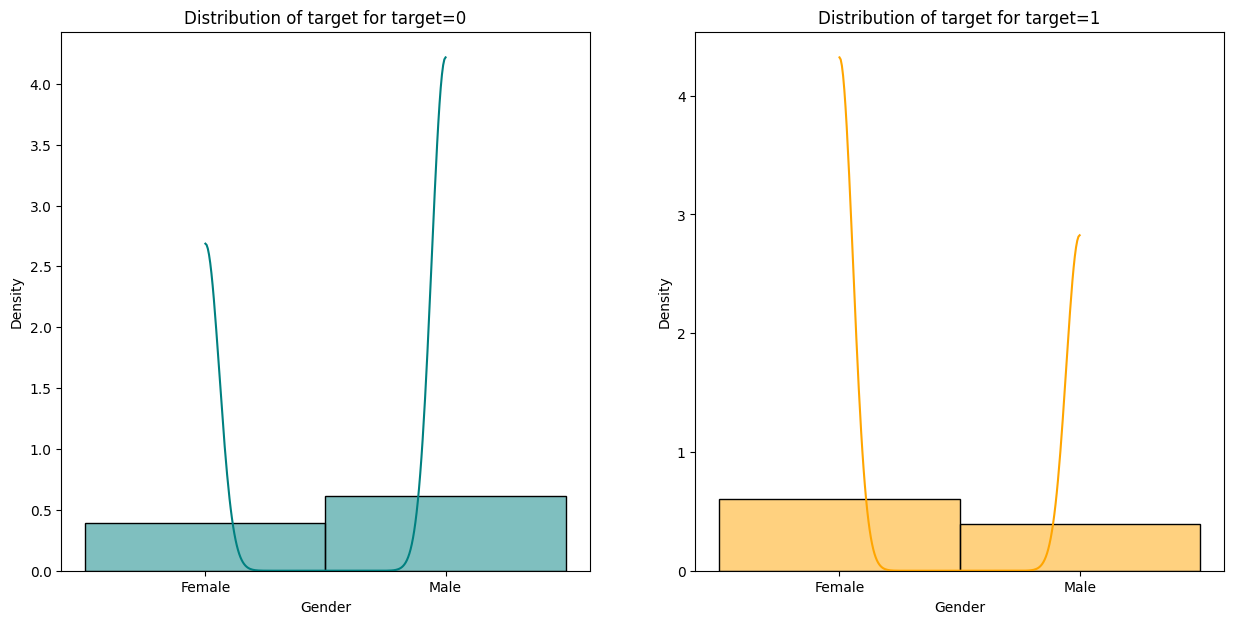

<Figure size 1500x700 with 0 Axes>

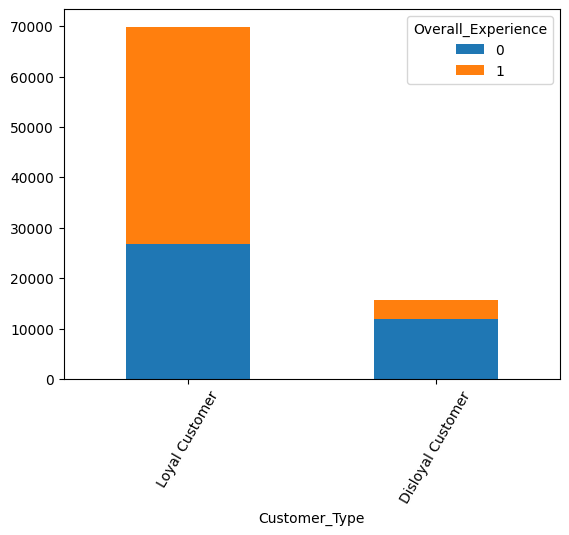

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


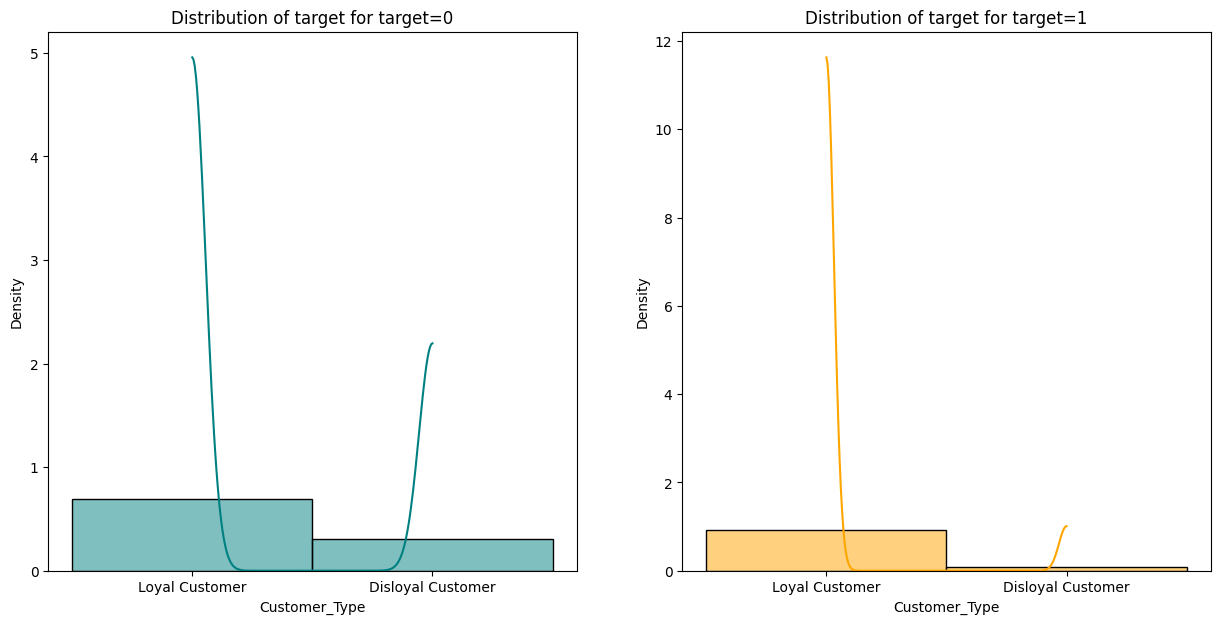

<Figure size 1500x700 with 0 Axes>

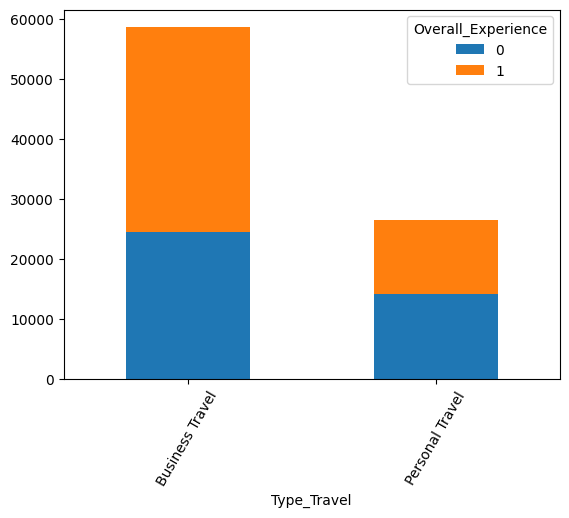

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


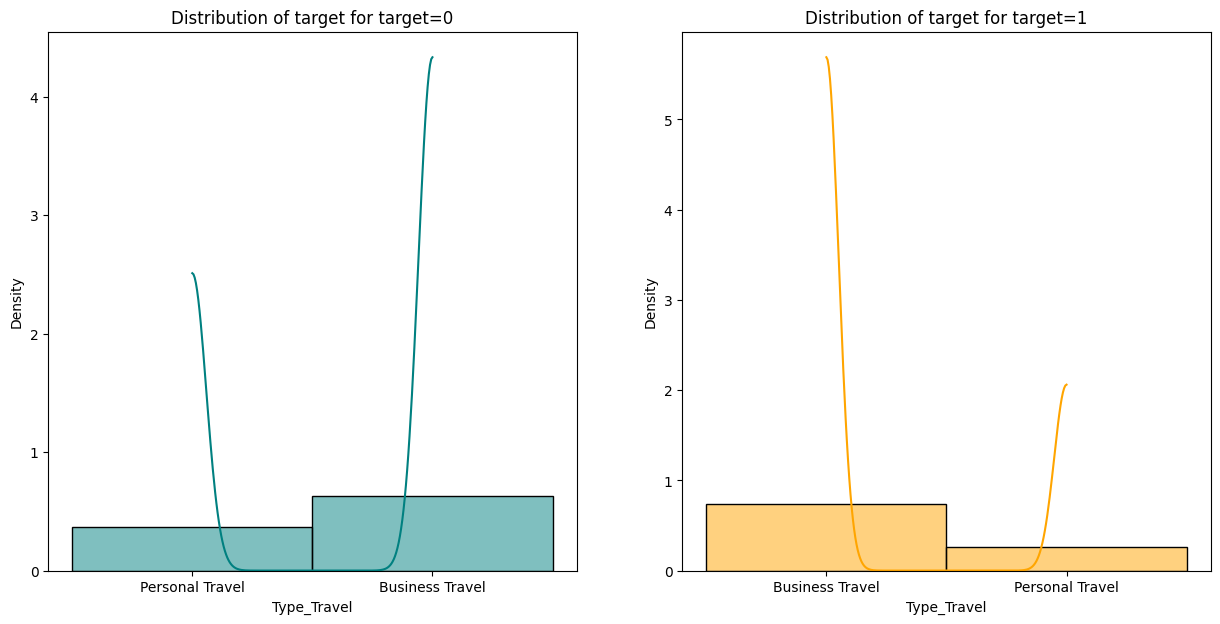

<Figure size 1500x700 with 0 Axes>

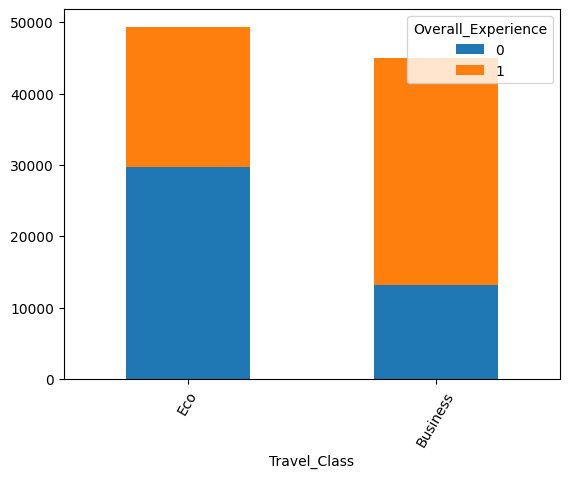

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


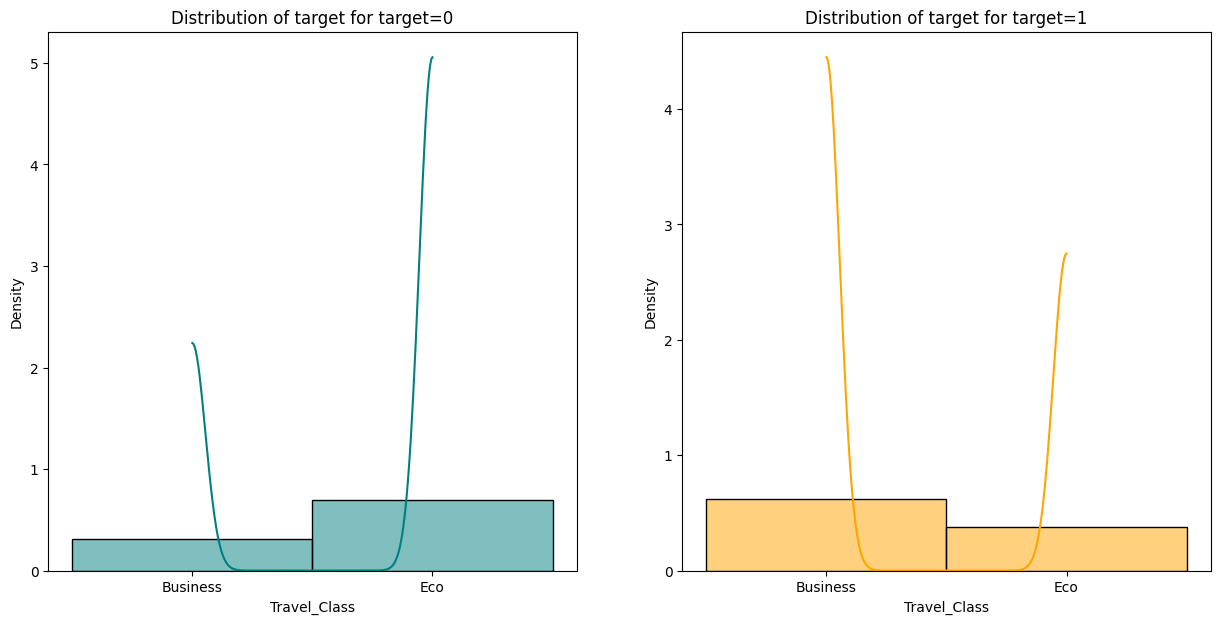

<Figure size 1500x700 with 0 Axes>

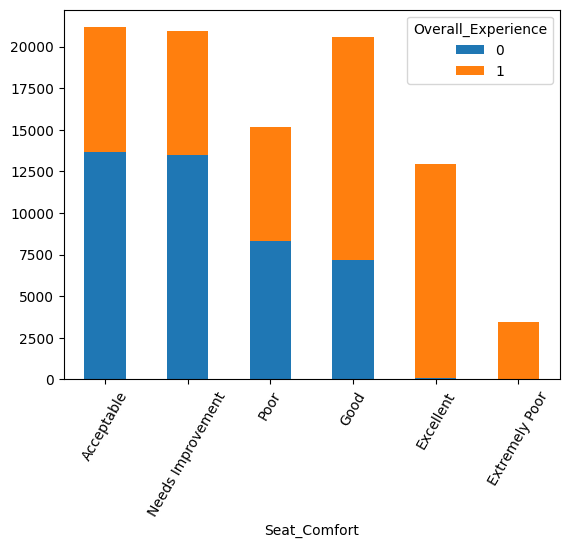

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


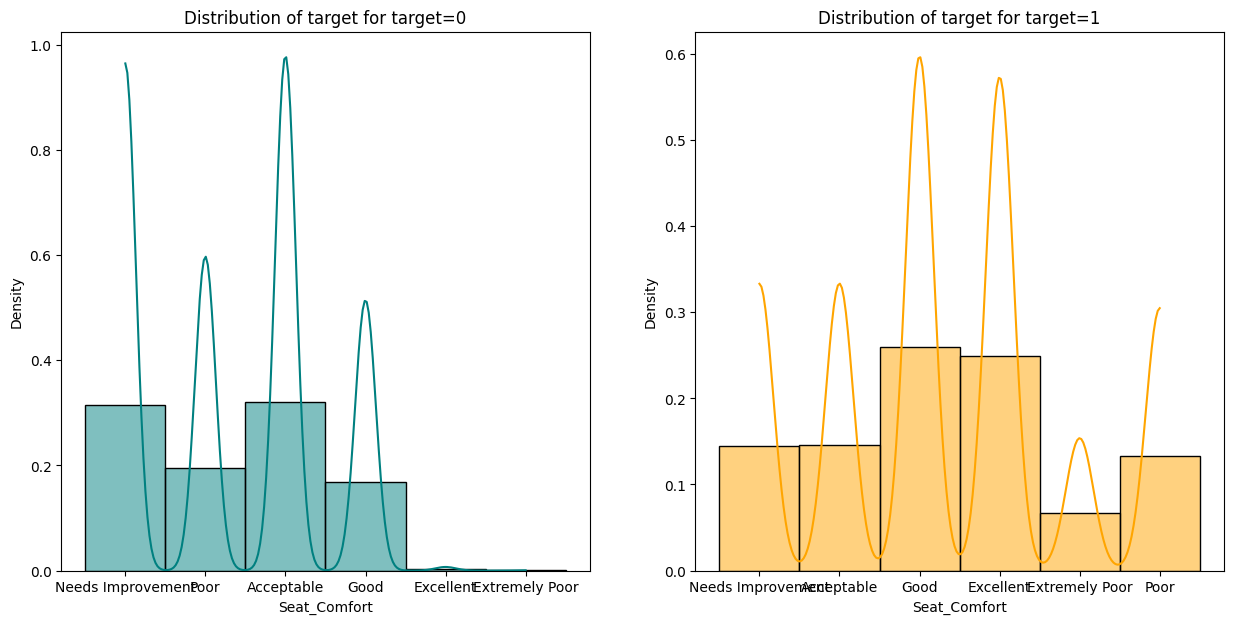

<Figure size 1500x700 with 0 Axes>

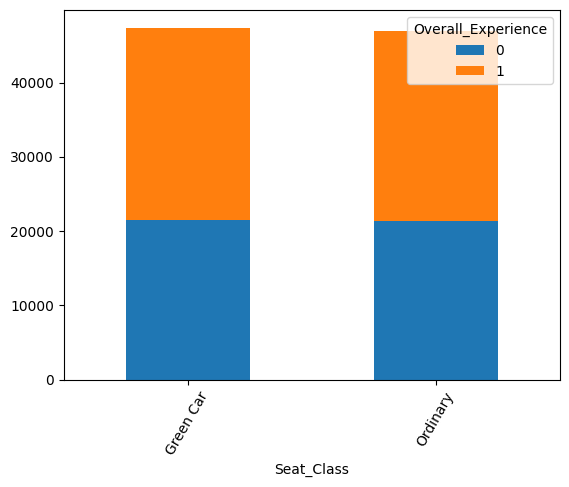

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


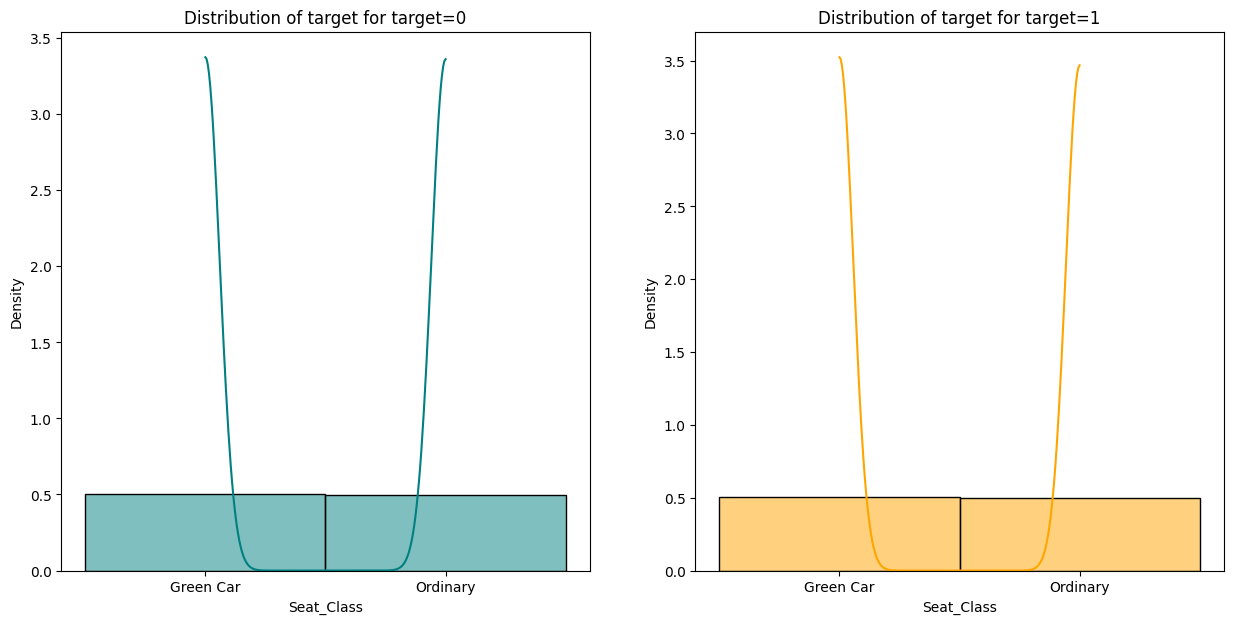

<Figure size 1500x700 with 0 Axes>

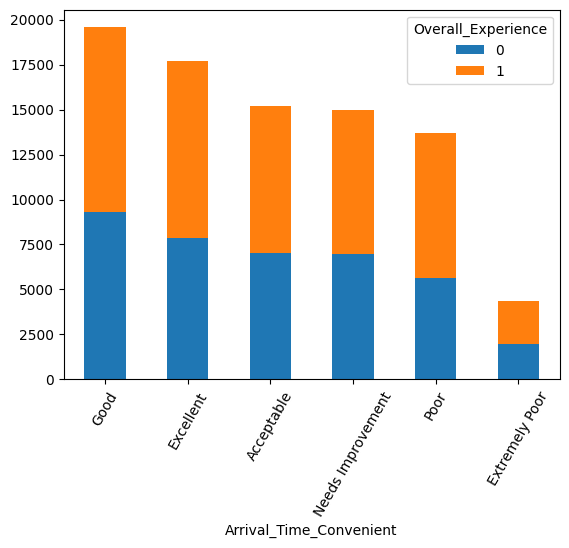

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


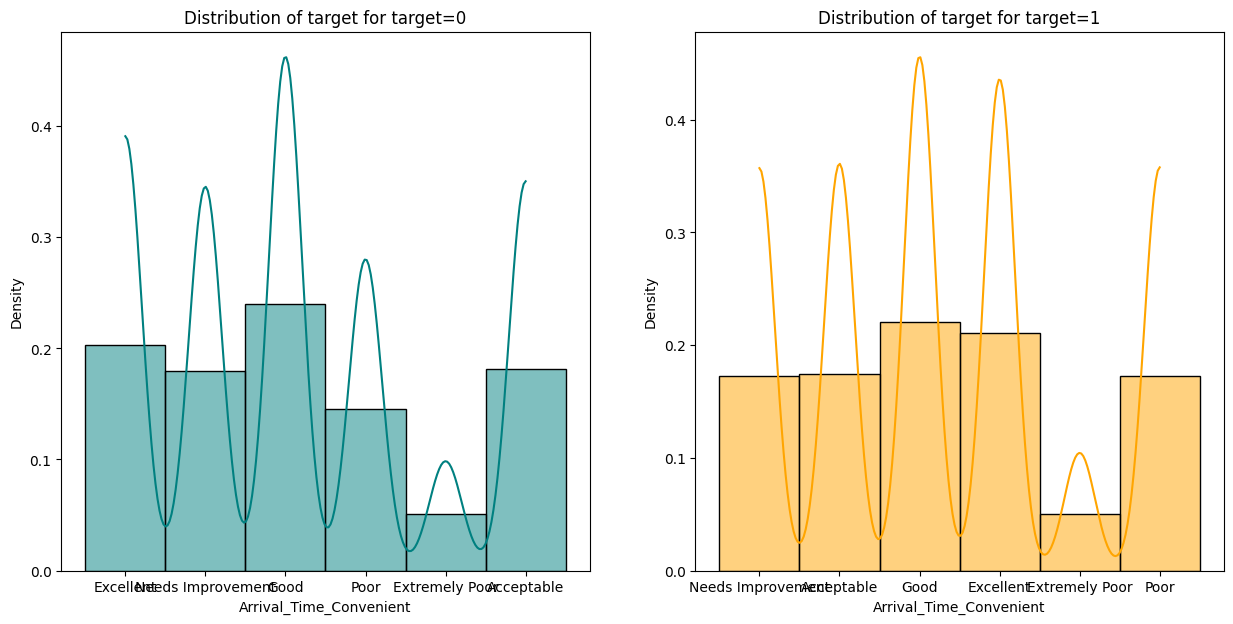

<Figure size 1500x700 with 0 Axes>

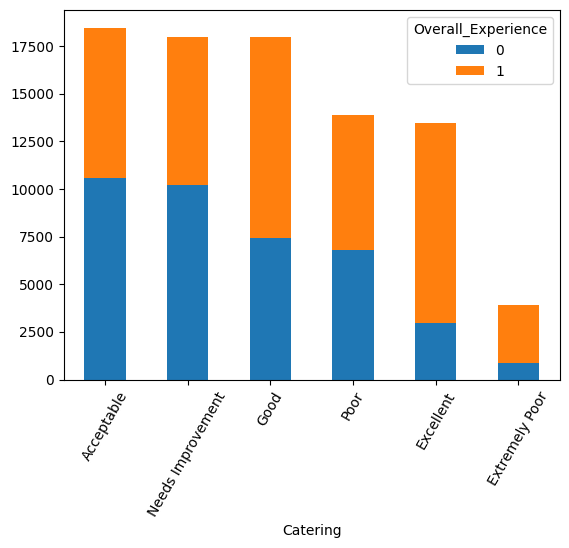

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


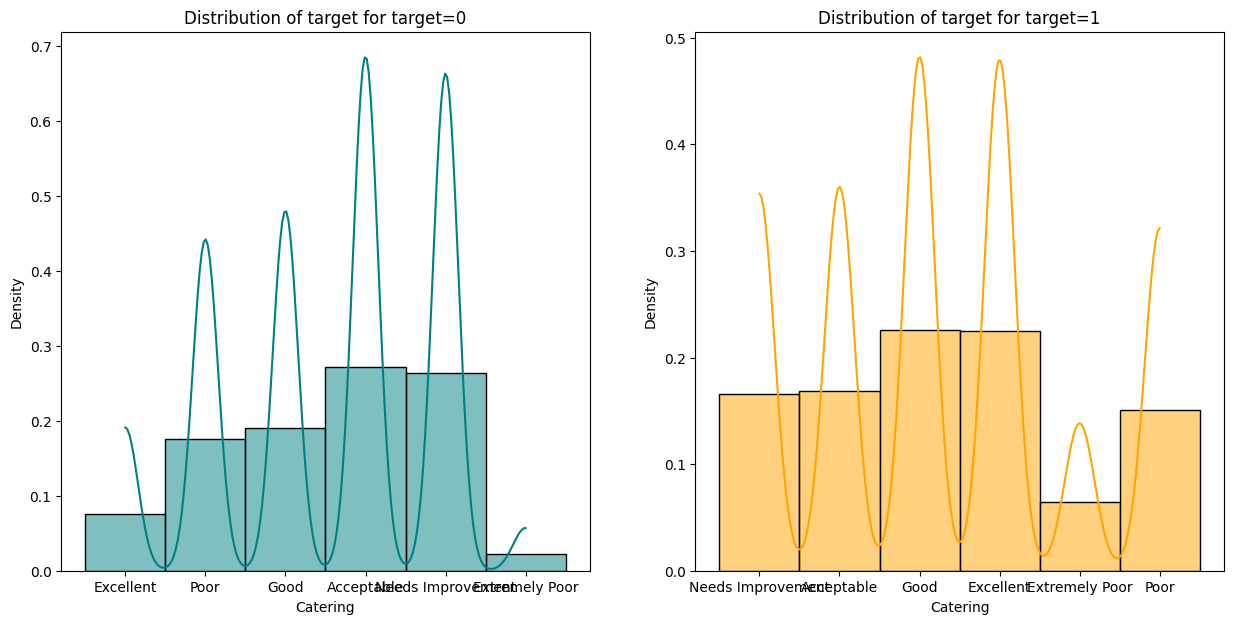

<Figure size 1500x700 with 0 Axes>

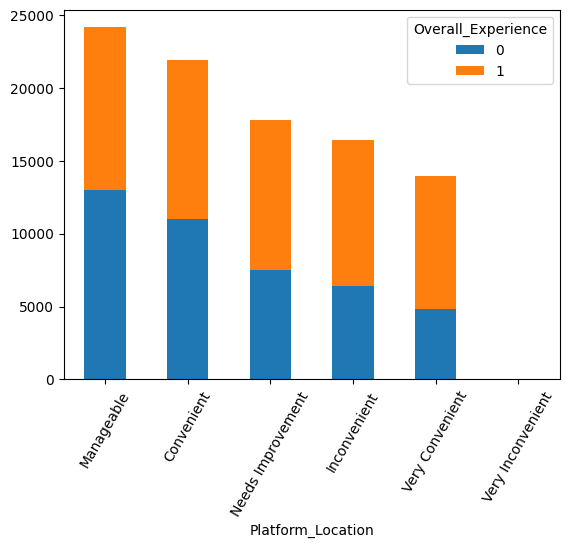

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


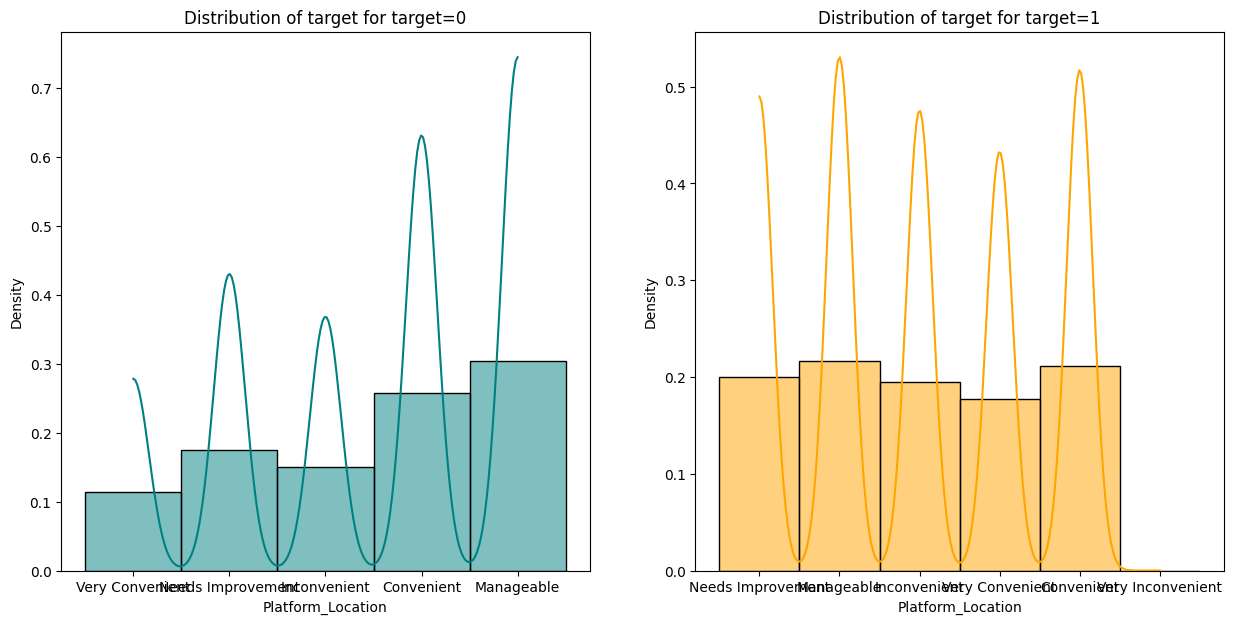

<Figure size 1500x700 with 0 Axes>

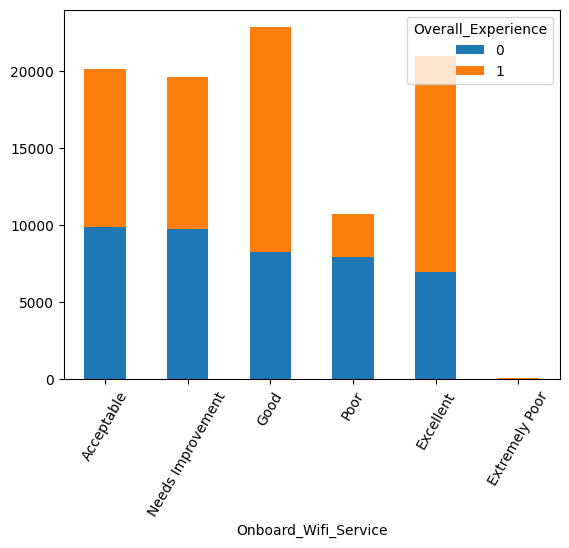

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


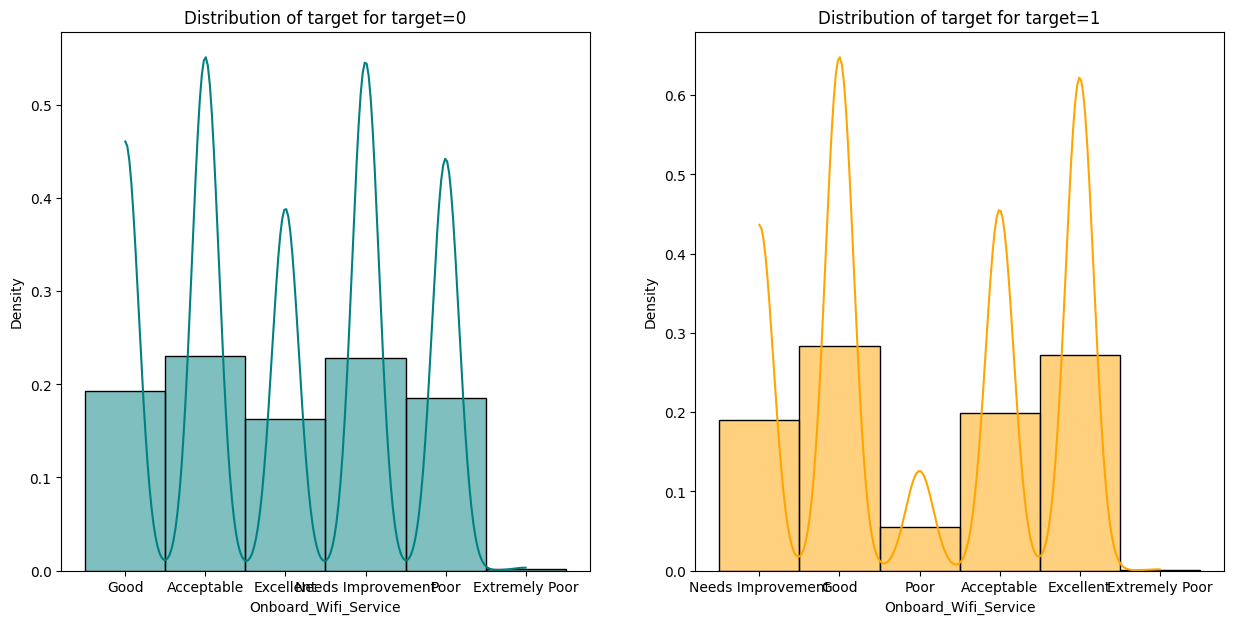

<Figure size 1500x700 with 0 Axes>

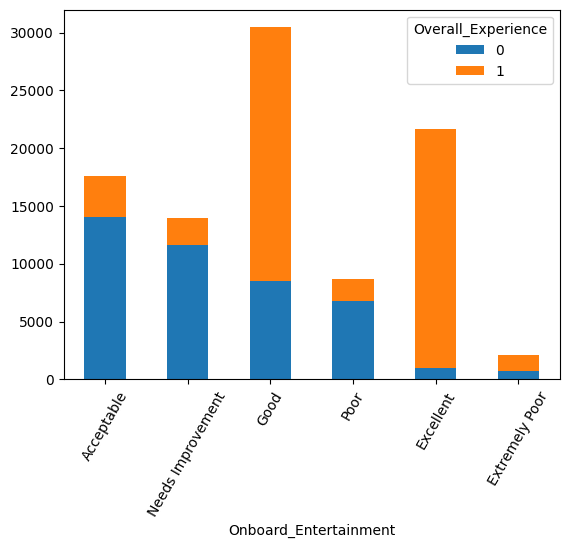

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


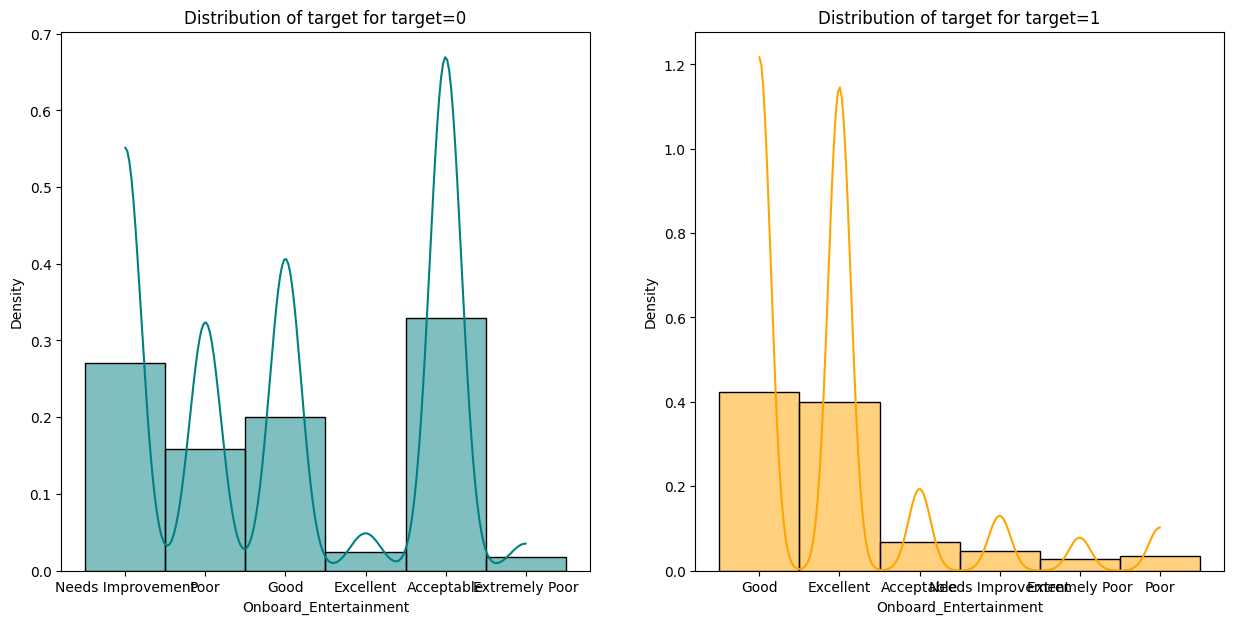

<Figure size 1500x700 with 0 Axes>

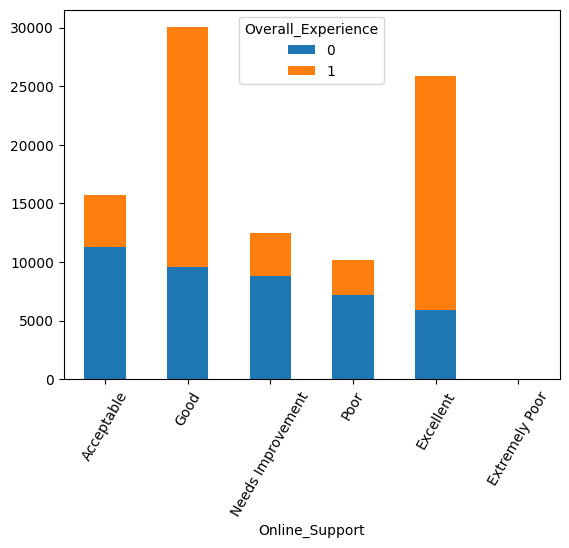

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


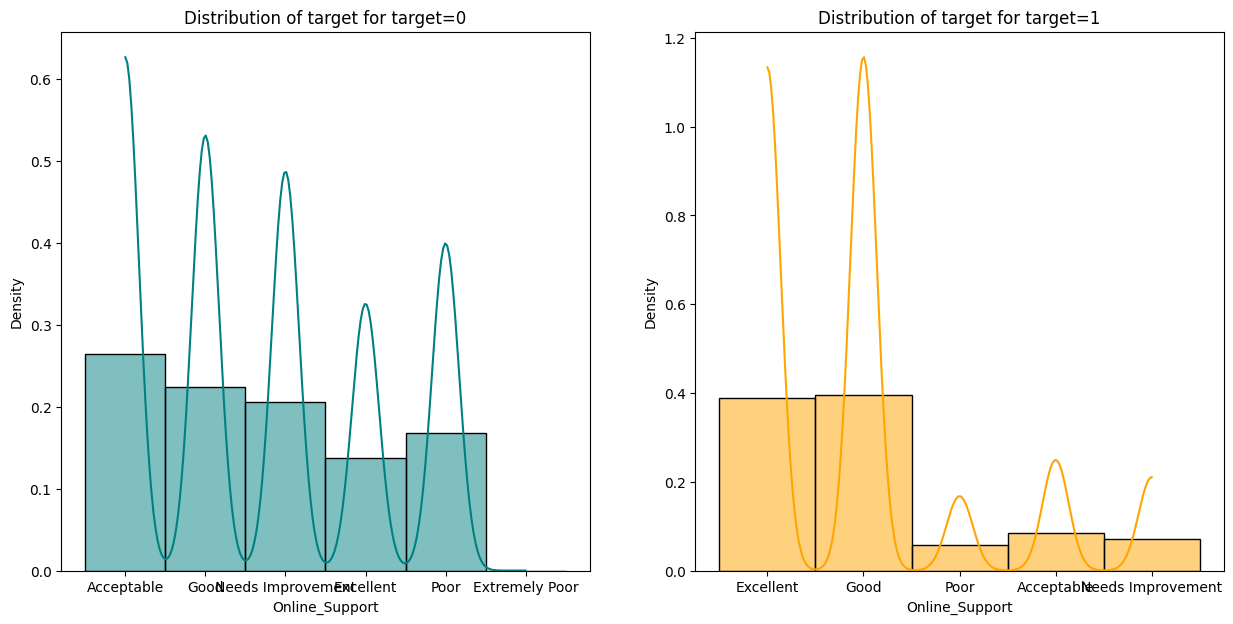

<Figure size 1500x700 with 0 Axes>

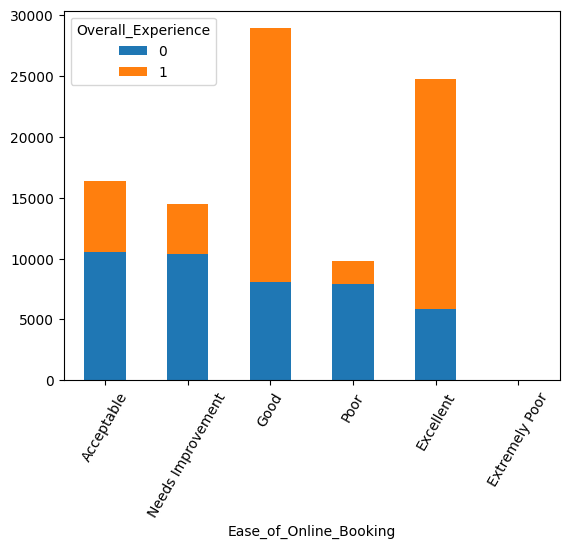

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


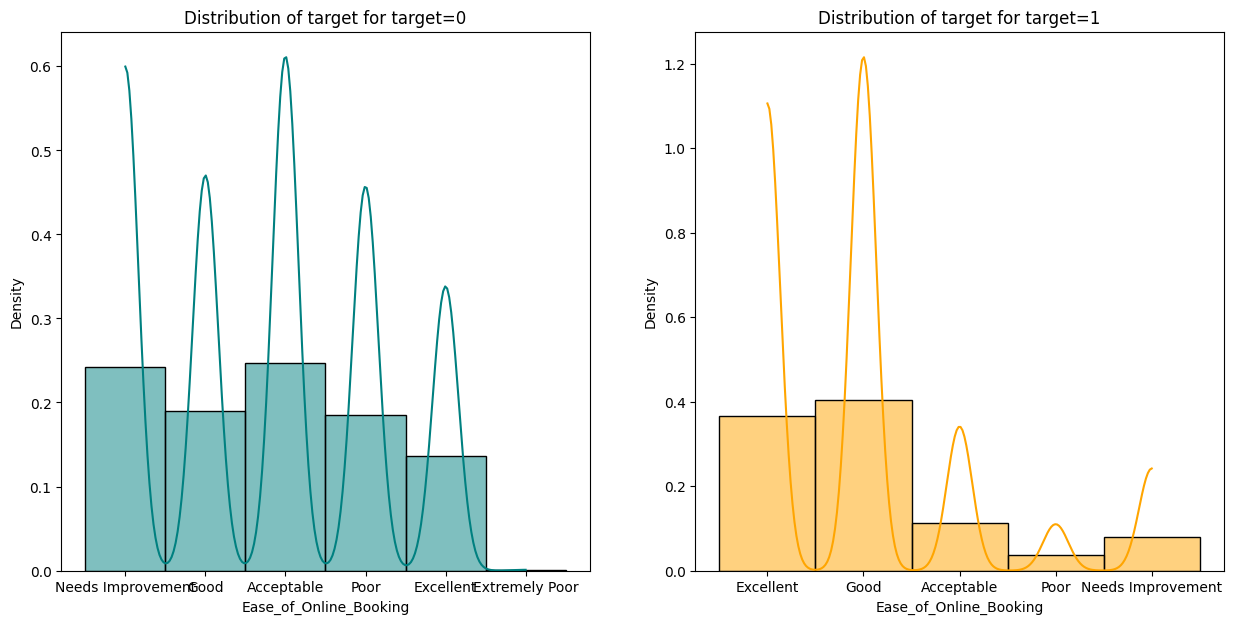

<Figure size 1500x700 with 0 Axes>

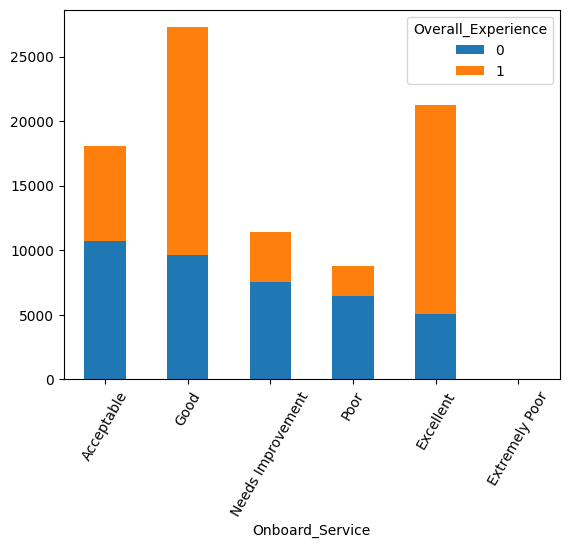

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


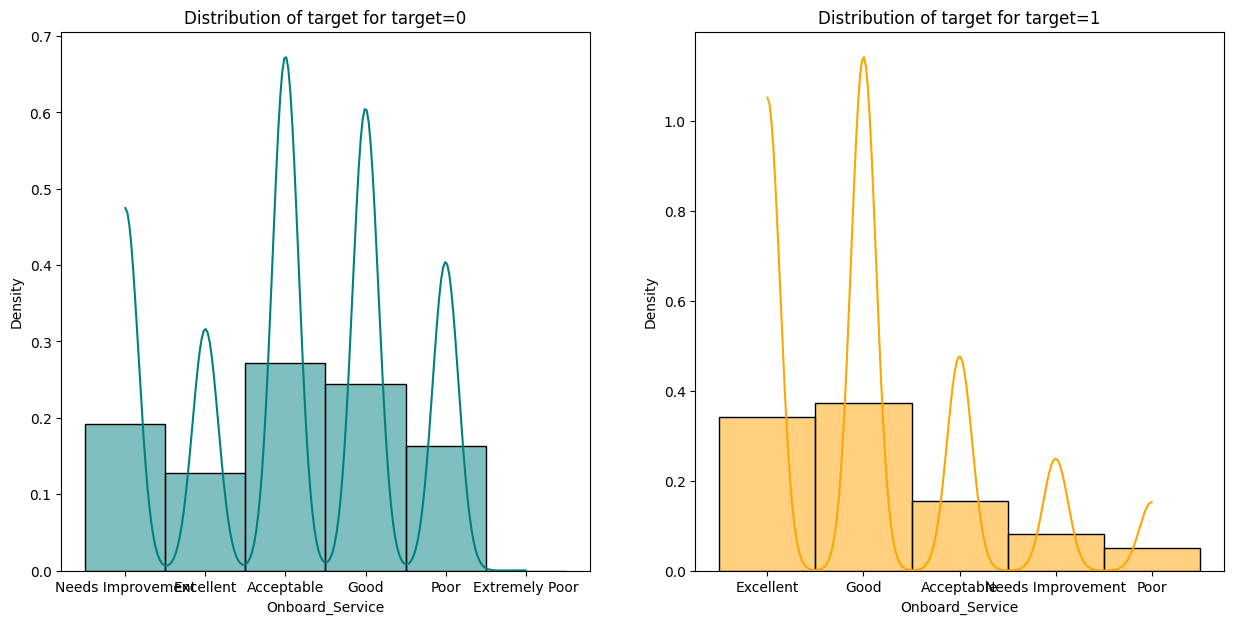

<Figure size 1500x700 with 0 Axes>

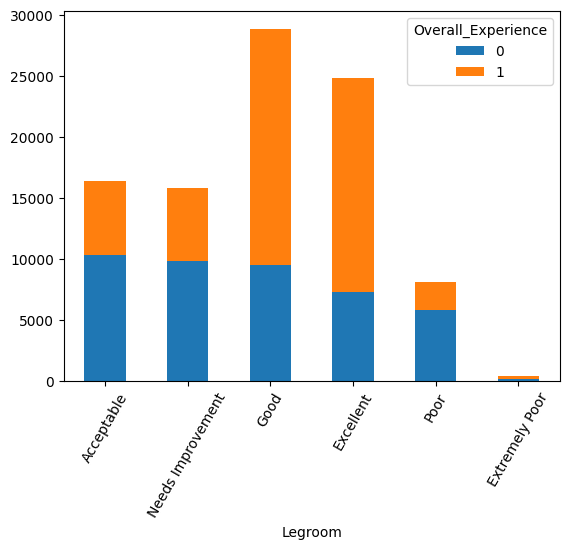

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


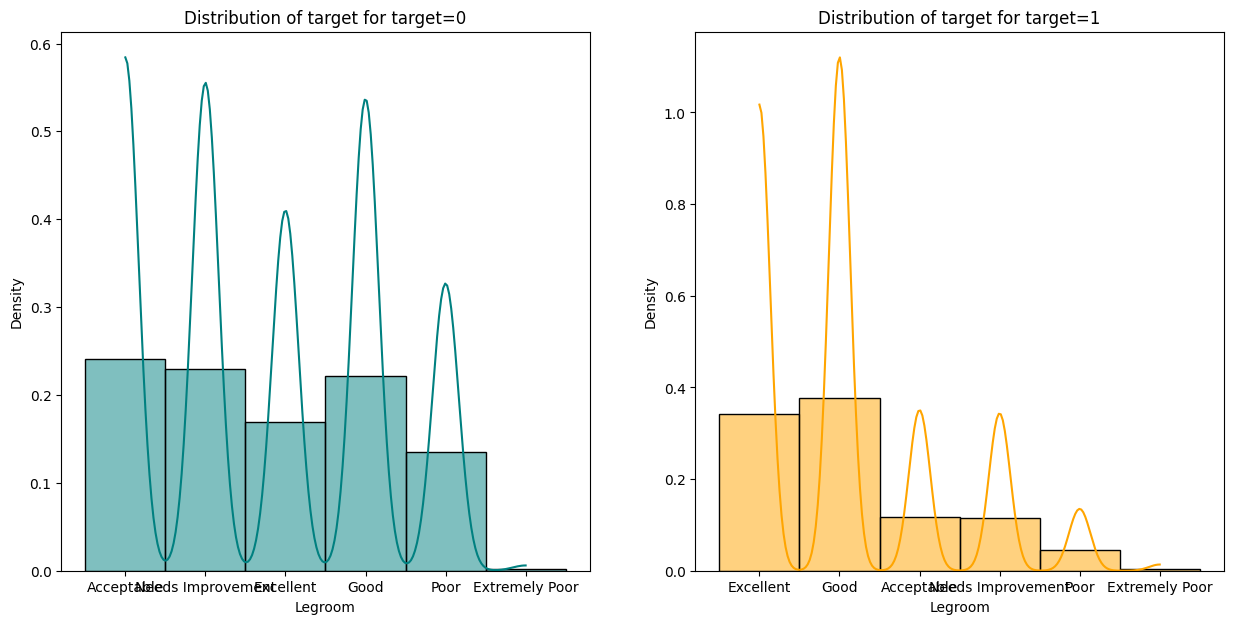

<Figure size 1500x700 with 0 Axes>

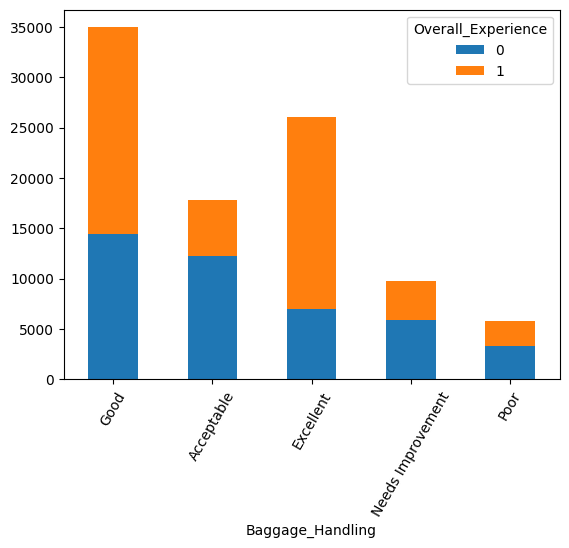

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


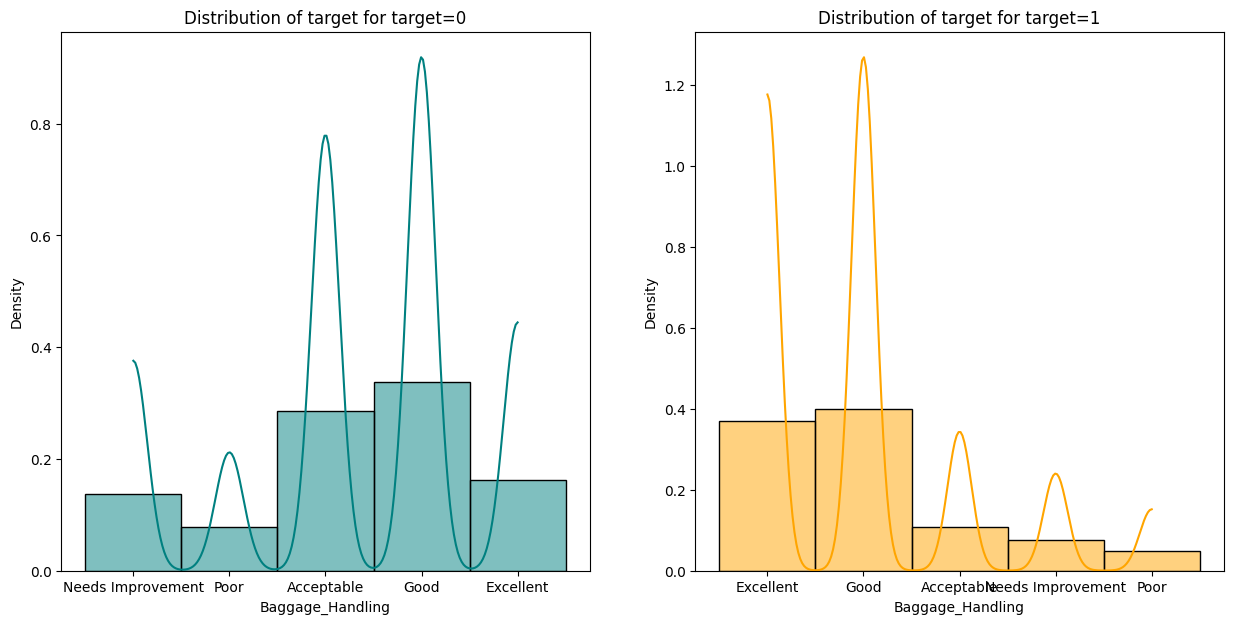

<Figure size 1500x700 with 0 Axes>

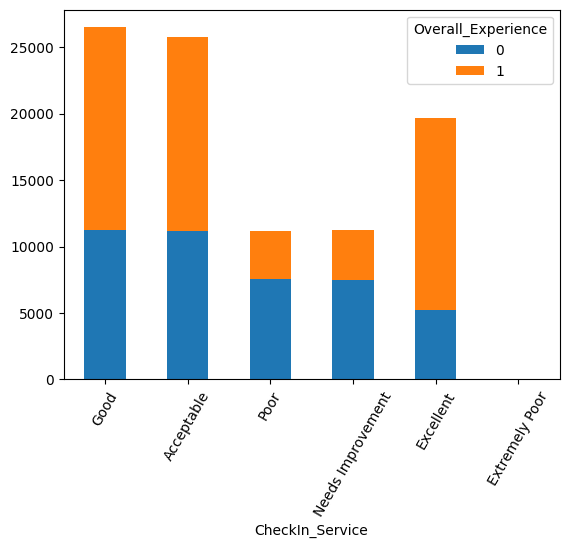

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


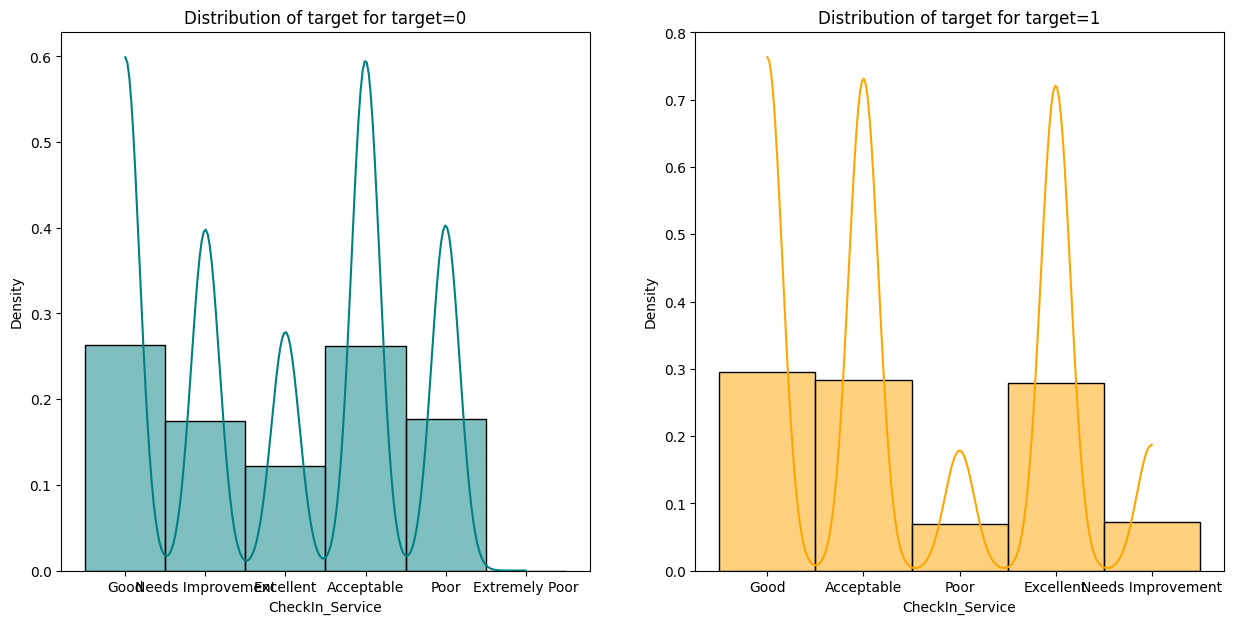

<Figure size 1500x700 with 0 Axes>

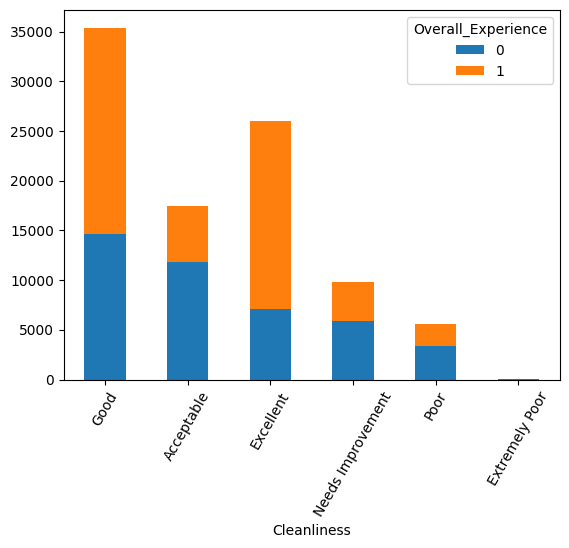

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


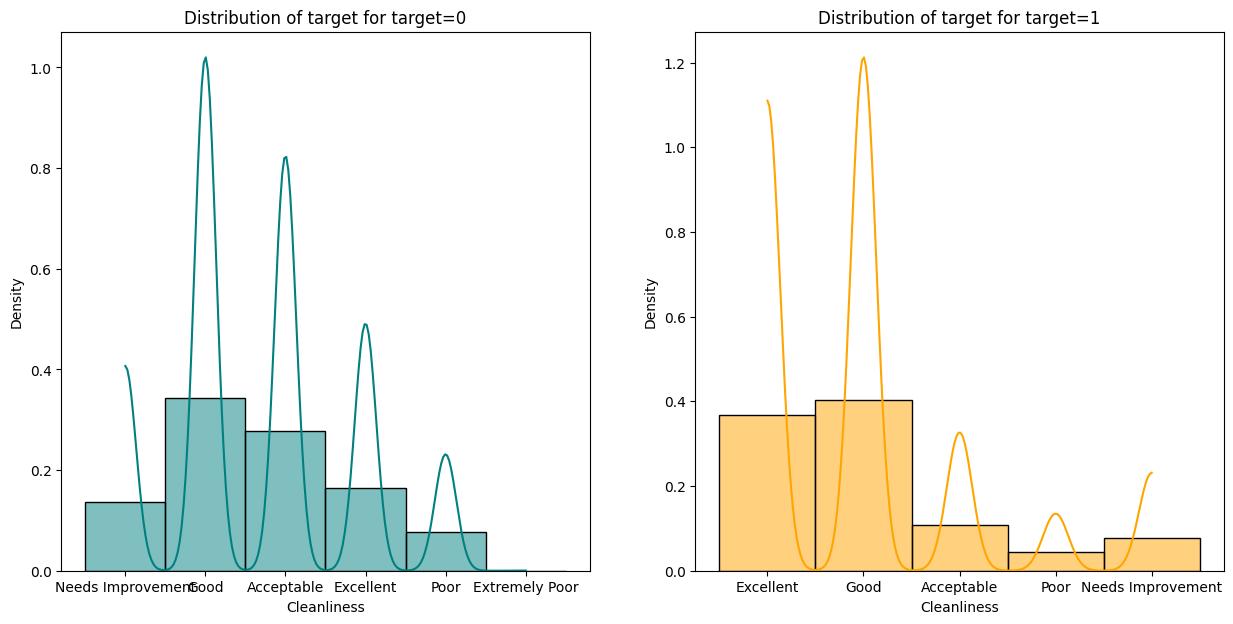

<Figure size 1500x700 with 0 Axes>

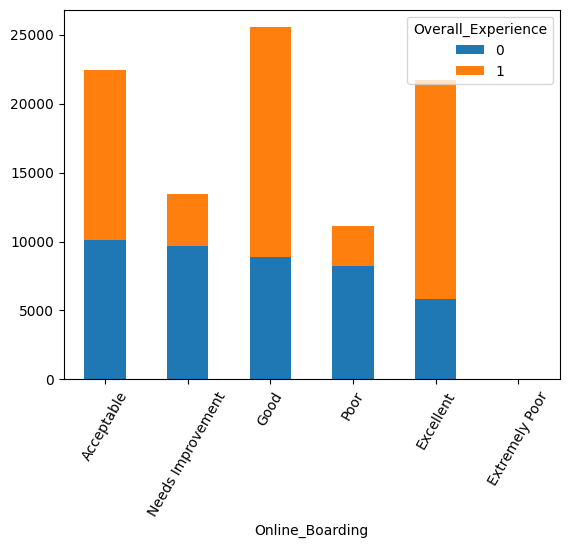

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


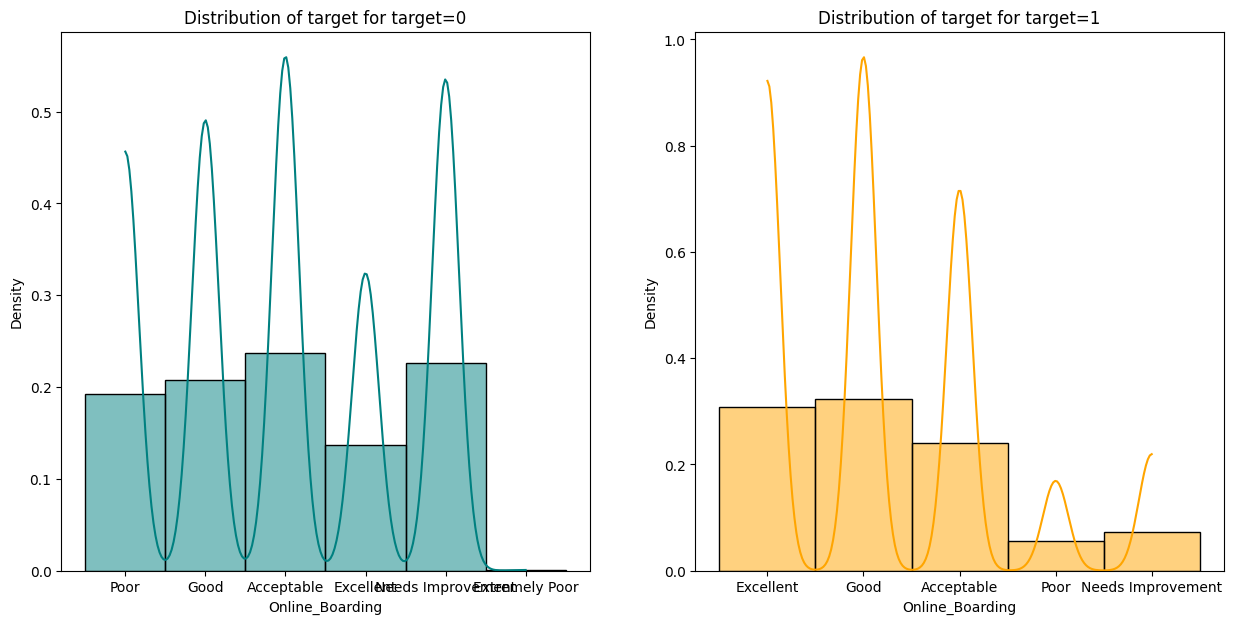

In [65]:
for col in categorical_columns:
    multi_analyze(df, col, target_col)

## Data Preprocessing

- Missing value treatment (if needed): **No missing value**
- Feature engineering (if needed): **Carried out below**
- Outlier detection and treatment (if needed): **Carried out below**
- Preparing data for modeling: **Carried out below**

### Treatment and Transformations

In [94]:
df.shape

(94379, 25)

In [95]:
df = df.dropna()
df.shape

(55503, 25)

**Outlier Treatment**

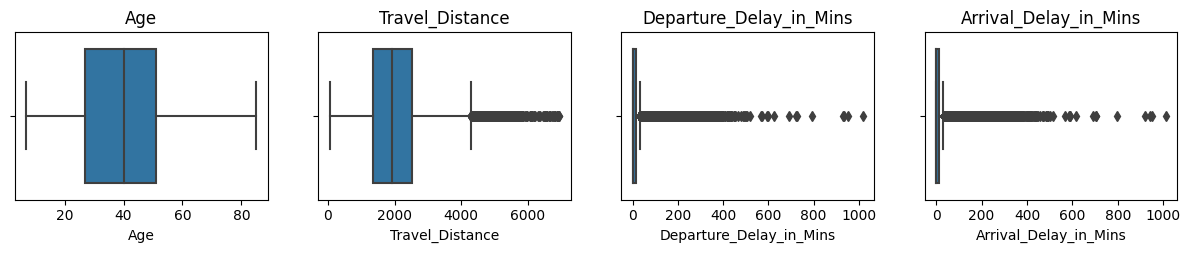

In [96]:
### Check for outliers
plt.figure(figsize=(15, 10))
for col, col_name in enumerate(numeric_columns):
    plt.subplot(4, 4, col + 1)
    sns.boxplot(data=df,x=col_name)
    plt.title(col_name)

plt.show()

In [97]:
### Cap extreme values at 5th and 95th percentile

def cap_column_values(df, column_name):
    # Calculate the 5th and 95th percentiles
    lower_bound = df[column_name].quantile(0.05)
    upper_bound = df[column_name].quantile(0.95)

    # Cap the column values between the percentiles
    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in numeric_columns:
  df = cap_column_values(df,col)

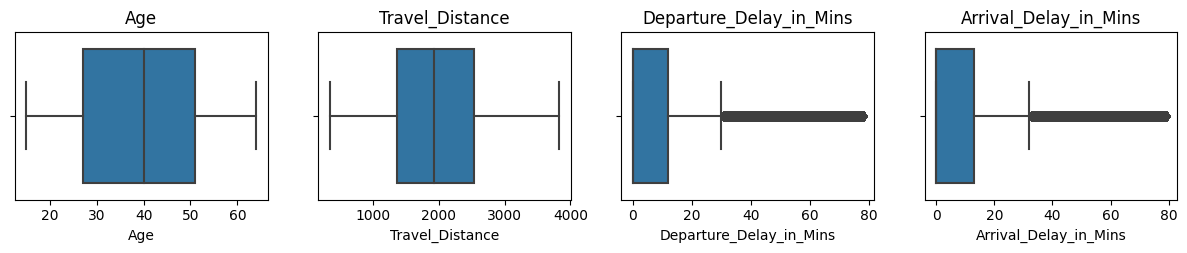

In [98]:
### Check for outliers
plt.figure(figsize=(15, 10))
for col, col_name in enumerate(numeric_columns):
    plt.subplot(4, 4, col + 1)
    sns.boxplot(data=df,x=col_name)
    plt.title(col_name)

plt.show()

**Creating dummy variables for categorical Variables**

In [100]:
# Creating dummy variables
df = pd.get_dummies(data = df, columns = categorical_columns, drop_first = True)

In [101]:
df.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,...,Cleanliness_Excellent,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
1,98800002,48.0,2200,9.0,0.0,0,True,True,True,True,...,False,False,True,False,False,False,False,True,False,False
2,98800003,43.0,1061,77.0,79.0,1,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,98800005,50.0,1981,0.0,0.0,1,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
5,98800006,44.0,2810,0.0,0.0,1,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,98800007,56.0,2029,0.0,0.0,0,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False


**Removing Skewness**

In [102]:
## Check Skewness in the data
for col in numeric_columns:
  print(col, df[col].skew())

Age -0.01641001605501949
Travel_Distance 0.1793796098687852
Departure_Delay_in_Mins 2.0967876365580147
Arrival_Delay_in_Mins 2.073805169414913


In [91]:
def remove_skewness(df, column_name):
    # Apply transformation to the specified column
    if df[column_name].skew()>=0:
      df[column_name] = np.sqrt(df[column_name])
    else:
      transformed_data, _ = boxcox(df[column_name])
      df[column_name] = transformed_data

    return df


for col in numeric_columns:
  df = remove_skewness(df,col)

**Define X, Y, Test and Train**

In [103]:
X = df.drop(["Overall_Experience","ID"], axis=1)
Y = df["Overall_Experience"]

## Enable Stratified Sampling while performing split using stratify argument
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)

**Scaling the data**

In [107]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [108]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Overall_Experience
1    0.546896
0    0.453104
Name: proportion, dtype: float64
Percentage of classes in test set:
Overall_Experience
1    0.546874
0    0.453126
Name: proportion, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
for column in df.columns:
  uni_analyze(df,column)

##Key Notes before Modelling

**What is the importanct business KPI here?**
- We need to minimize false negatives or Type II error, that is customers who would actually convert but the model predicts as non-converting since this would lead to loss of potential customer and business loss.
- Reducing Type I error can help save company resources as those would be customers that were not going to convert but the model predicts as potential customers. For a startup, burn rates are usually less of a concern as compared to the conversion rates.

**What is the importanct model metric here?**
- Since we wish to have less False Negative and more True Positives, the important metric for us to score would be **Recall** in order to increase the ratio of True Positives to True Positives+False Negatives

**Define Function to Calculate Performance Metrics**

In [109]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    conf_mat = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(conf_mat, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Get Class Imbalance to initialize weights of the trees. The weights are (1 - class imbalance%) for a class

In [129]:
class_df = df.groupby('Overall_Experience').agg({'ID':'count'}).reset_index()
column_sums = class_df.sum()
class_df = class_df.iloc[:, 1:].apply(lambda x: (x / column_sums[x.name]), axis=0)
class_df_list = class_df.ID

In [130]:
class_weight = {0: class_df_list[1], 1:class_df_list[0]}

In [131]:
class_weight

{0: 0.5468893573320361, 1: 0.4531106426679639}

## Building a Decision Tree model

In [132]:
dt = DecisionTreeClassifier(class_weight = class_weight, random_state = 1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5468893573320361,
                                     1: 0.4531106426679639},
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17604
           1       1.00      1.00      1.00     21248

    accuracy                           1.00     38852
   macro avg       1.00      1.00      1.00     38852
weighted avg       1.00      1.00      1.00     38852



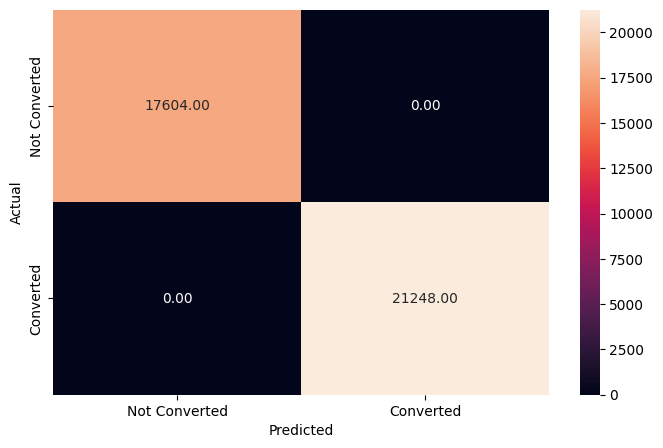

In [116]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- **100%** score for all metrics

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7545
           1       0.94      0.94      0.94      9106

    accuracy                           0.93     16651
   macro avg       0.93      0.93      0.93     16651
weighted avg       0.93      0.93      0.93     16651



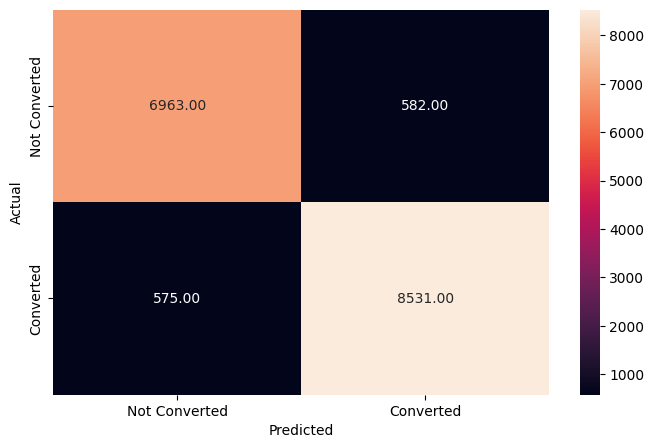

In [117]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

- The Decision Tree is overfitting as the recall of 100% in training dropped down to 73% in test for True class.
- Hyperparameter Tuning might make this model better

**Check Feature Importance of Decision Tree**

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

**Visualizing the Tree**

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth=6, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Hyperparameter Tuning for Decision Tree**

In [133]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = class_weight, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5468893573320361,
                                     1: 0.4531106426679639},
                       max_depth=6, min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     17604
           1       0.82      0.93      0.87     21248

    accuracy                           0.85     38852
   macro avg       0.86      0.84      0.85     38852
weighted avg       0.86      0.85      0.85     38852



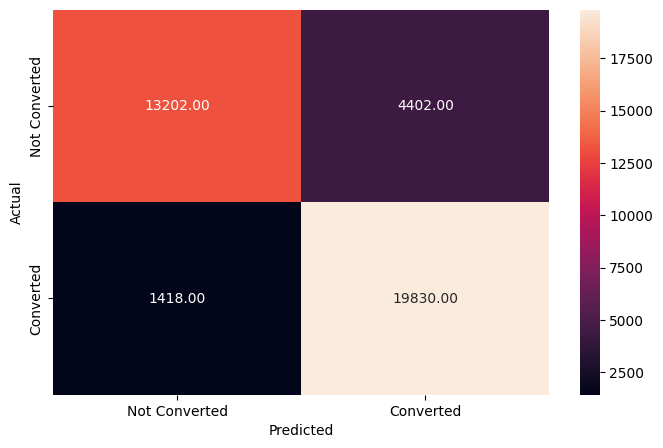

In [119]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      7545
           1       0.82      0.93      0.87      9106

    accuracy                           0.85     16651
   macro avg       0.86      0.84      0.85     16651
weighted avg       0.86      0.85      0.85     16651



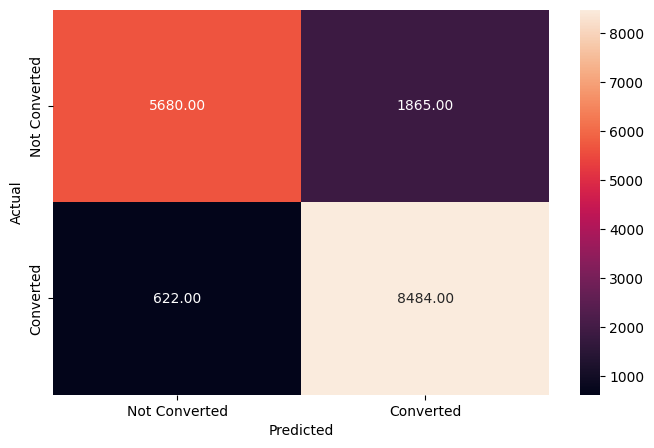

In [120]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

The recall is maintained at 90% in both train & test! Clearly tuning the hyperparameters has helped make the model more robust and ready-to-use. The recall is what is required the most to ensure that the False Negatives are low.

**Check Feature Importance of Tuned Decision Tree**

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

- Hyperparameter tuning seems to have oversimplified the decision trees learning as it's now assigned 3 features with approx 90% importance. This means that the model has a high bias.
- This means that despite the model giving a 90% test recall, the model can not be deployed as the bias is very high.
- Random Forest can help minimize this oversimplification

In [ ]:
plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator, max_depth=6, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Do we need to prune the tree?

DT without hyperparameter tuning seems to be overfitting the data. Pruning this tree might help reduce this problem.
We can prune the decision tree by fixing
- max_leaf_nodes
- min_samples_leaf
- max_depth

Note that the hyperparameter tuning has helped us prune the tree by limiting the max_depth and min_samples_leaf in the tree.


---
We can also reinitialise the tree with fixed hyperparameters to not let it over fit. Below is the code for the same.


In [134]:
#Build a new tree using fixed hyperparameter

dtree_pruned = tree.DecisionTreeClassifier(class_weight=class_weight, criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.5468893573320361,
                                     1: 0.4531106426679639},
                       max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17604
           1       0.90      0.83      0.87     21248

    accuracy                           0.86     38852
   macro avg       0.86      0.86      0.86     38852
weighted avg       0.86      0.86      0.86     38852



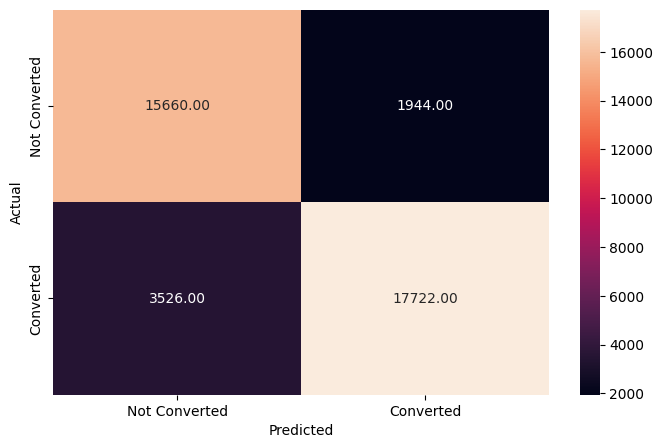

In [135]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_pruned.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7545
           1       0.87      0.88      0.87      9106

    accuracy                           0.86     16651
   macro avg       0.86      0.86      0.86     16651
weighted avg       0.86      0.86      0.86     16651



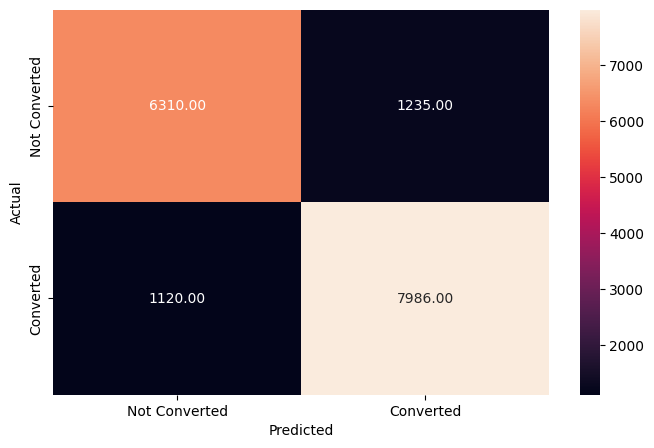

In [123]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_pruned.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

- Limiting the number of leafs and nodes has helped reduce overfitting as the recall is now similar for train and test set.
- However this isn't the best model output we have. The hyperparameter tuned result is the best recall we get.
- Upon pruning we would have limited the feature importance to only a few features that we can observe below.
- This is why it's best to let hyperparameter tuning take care of the parameters rather than manually tweaking them.

In [ ]:
## Plot Feature Importance
importances = dtree_pruned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

## Building a Random Forest model

In [136]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = class_weight, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5468893573320361,
                                     1: 0.4531106426679639},
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17604
           1       1.00      1.00      1.00     21248

    accuracy                           1.00     38852
   macro avg       1.00      1.00      1.00     38852
weighted avg       1.00      1.00      1.00     38852



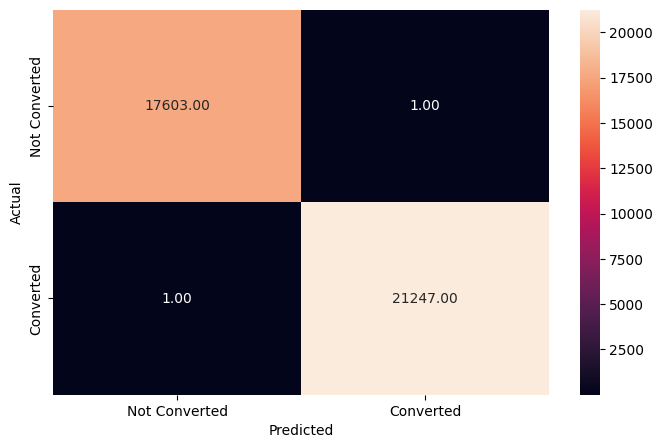

In [138]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7545
           1       0.96      0.94      0.95      9106

    accuracy                           0.95     16651
   macro avg       0.95      0.95      0.95     16651
weighted avg       0.95      0.95      0.95     16651



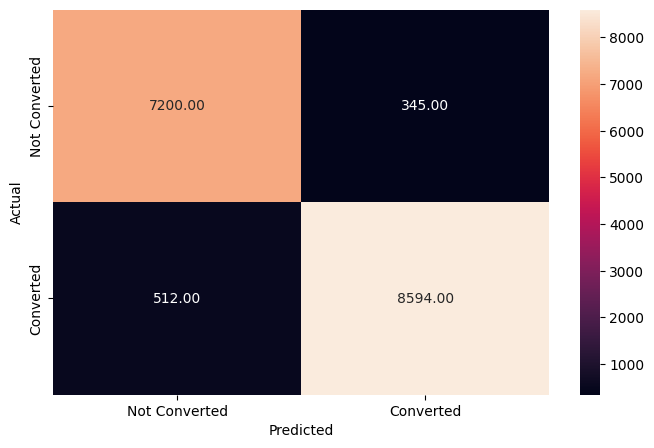

In [139]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**
- Clear case of overfitting. The recall on the training data is 1, while the recall on the test data is only ~ 0.69 for class 1.
- Hyperparameter Tuning should make this model better

**Feature Importance for Random Forest**

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

The top 3 features picked by Random Forest are
1. time_spent_on_website
2. first_interaction_website
3. profile_completed_medium

The least important features are:
1. print_media_type2_1 : True for Print Media Type 2
2. Referral_1 : True for Referral
3. print_media_type1_1 : True for Print Media Type 1

**Hyperparamter Tuning for Random Forest**

In [141]:
# Initialise RF
rf_estimator_tuned = RandomForestClassifier(class_weight = class_weight, random_state = 1)

# Define Parameter Grid
params_rf = {"n_estimators": [90,110,130,150,170],
    "max_depth": [3,4,5,6],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9, 'auto'],
    "max_samples": [0.8 ,0.9, 1]
             }

# Make Scorer for Recall for Class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the data
rf_estimator_tuned.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=0.8,
                       max_samples=1, min_samples_leaf=20, n_estimators=110,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17604
           1       0.55      1.00      0.71     21248

    accuracy                           0.55     38852
   macro avg       0.27      0.50      0.35     38852
weighted avg       0.30      0.55      0.39     38852



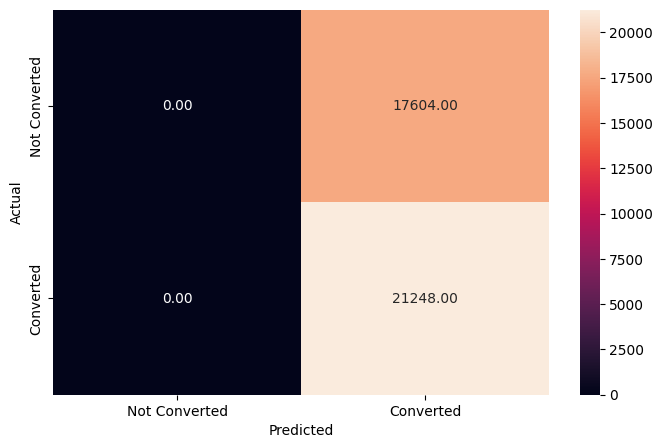

In [142]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7545
           1       0.55      1.00      0.71      9106

    accuracy                           0.55     16651
   macro avg       0.27      0.50      0.35     16651
weighted avg       0.30      0.55      0.39     16651



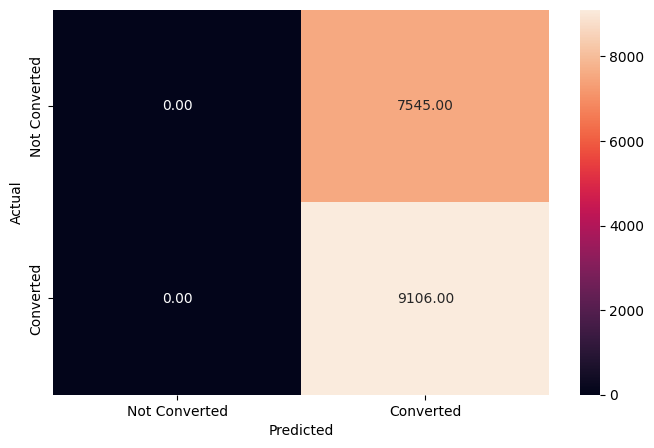

In [143]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

The recall increased from 69% to 89% on True class after hyperparameter tuning.
The train and test recall are comparable. This can be a reliable model for predictions going forward.

**Feature Importance for Tuned Random Forest**

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

Hyperparameter Tuning for Random Forest doesn't oversimplify the model. We can still see that all the features have some level of importance associated.

## Do we need to prune the tree?

- Random Forests are able to avoid high levels of overfitting because of two reasons:
  1. Bootstrapping
  2. For large enough number of data points, the individual trees are almost independent

- However we see that our baseline Random Forest is overfitting as the train recall is much higher than the test recall. This means we need to prune the baseline tree.
- The hyperparameter tuning has helped reduce the overfitting as the tuned RF object has a max_depth set to 4 and the number of estimators also at the lower level of hyperparameter grid.
- Another way to prune the baseline tree would be through the use of the ccp_alpha parameter while initializing the object. The cost complexity pruning (ccp_alpha) parameter determines the effective amount of regularization applied during the pruning process. Below is the code for the same. Note that this hyperparameter can also be tuned during hyperparameter tuning.

In [144]:
# Fitting the Random Forest classifier on the training data
rf_estimator_pruned = RandomForestClassifier(class_weight = class_weight, random_state = 1, ccp_alpha=0.005)

rf_estimator_pruned.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.005,
                       class_weight={0: 0.5468893573320361,
                                     1: 0.4531106426679639},
                       random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     17604
           1       0.92      0.88      0.90     21248

    accuracy                           0.89     38852
   macro avg       0.89      0.90      0.89     38852
weighted avg       0.90      0.89      0.89     38852



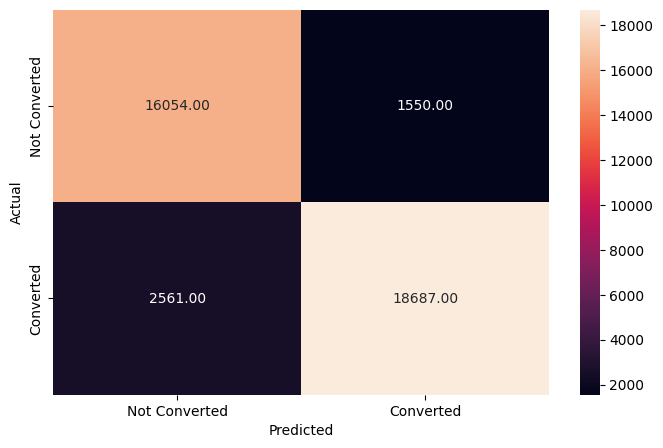

In [145]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator_pruned.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7545
           1       0.92      0.87      0.90      9106

    accuracy                           0.89     16651
   macro avg       0.89      0.89      0.89     16651
weighted avg       0.89      0.89      0.89     16651



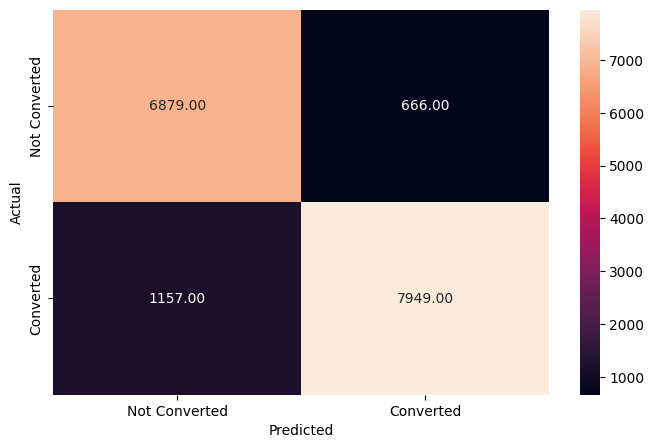

In [146]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator_pruned.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
# Plotting feature importance
importances = rf_estimator_pruned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df.plot(kind="bar")

- Pruning helped reduce the overfitting as the train and test recalls are now comparable.
- Pruning has also reduced the number of features that the model is considering to be significant.
- It's important to note that hyperparamter tuning of the max_depth, max_features & min_samples_leaf can be a better way to prevent overfitting rather than guessing the pruning parameter.

## Actionable Insights and Recommendations

**Insights:**
- The top 5 features picked by Random Forest are below. These features are the most important to focus on in order to drive more conversions.
  1. time_spent_on_website
  2. first_interaction_website
  3. profile_completed_medium
  4. page_views_per_vist
  5. age
- The least important features are below. These features seem to have the least impact in driving conversions.
  1. print_media_type2_1 : True for Print Media Type 2: Magazine
  2. Referral_1 : True for Referral
  3. print_media_type1_1 : True for Print Media Type 1: Newspaper
  4. profile_completed_low: Low Profile Completion
  5. educational_channels_1: True for Educational Channels
- Last Activity as phone activity comes out to be an important feature which is counter-intuitive to what we observe in univariate analysis. This indicates that the last activity has to be looked at in conjuction with other features to understand it's true impact. Or that Last Activity phone helps user use the website to convert faster.
- Referral has a very small base of users but a very high conversion rate. This is an interesting observation. Increasing number of referrals might help increase conversions.
- Most users interact first with the website. The website can be made more user interactive to retain customers and increase conversion likelihood.
- Largest last_activity is Email. The company is targeting a lot of the potential customer base with Emails.
- While High Profile Completion had a high proportion of converted users, the model is picking Medium Profile Completion with more importance. This means that Profile Completion is reaching a high level when the user has already converted and then is filling out the remaining profile.
<br>
<br><br>
Additional Insights as answered in the questions post EDA
1. Professionals have a higher percentage of conversions on their base while students have the least. The current occupation plays an important role intuitively in determining likelihood of conversion. Median of these professionals is around 52. These could be people trying to upskill and stay relevant in their current profession.
2. People interacting with the website as the first touchpoint have higher chance of converting as shown in the barplot and the conversion% table. The first interaction medium definitely works well. There can be another study done into why mobile app as a medium is not working well.
3. The company interacts with the prospects through website, email and the mobile app. Website activity has the highest conversion rate followed closely by email activity which means that customers are converting most likely after last interacting with the website. We can also see in univariate analysis that the company primarily targets the customers through Email medium as it has the highest count.
4. Of the 5 channels (Newspaper, Magazine, Digital, Referral, Education), Referrals have the highest conversion rate, however it would be important to note that only a total of 93 users have interacted with this medium. In conventional Newspaper, Magazine and Digital, Magazine has a slightly better conversion rate but not enough to make it significantly better than other channels.
5. It's clearly visibile that while high profile completion and medium profile completion has similar number of total prospects, high profile completion has a much higher conversion rate (42% against 19%). Therefore, having more details about the prospects is clearly increasing the chances of conversion.

**Recommendations:**<br>
- Increasing time_spent_on_website has a large impact on conversion likelihood. Making the user flow more interactive and gamifying website content can increase the total time spect on the website which will help with the conversions.
- Since first interaction with websites have large imapct on conversion likelihood, clearly more customers should be redirected to the website at the point of acquisition. This also means that there should be an in-depth analysis of the phone app funnel to understand where the drop off is happening in the user journey.
- page_views_per_visit can be increased by gamifying the content making the user spend more time on the website which allows more content to be absorbed by the user. Nested categorical content on websites filtered through user cohorts can help increase the page_views_per_vist and also the time_spent_on_website.
- The media channels seem to have low feature importance, however this doesn't mean that the organization should reduce spending on media. Of the total base that is exposed to the media content, a decent ~30% converts. These channels are medium of acquisition so will have a decayed impact on actual conversions.
- Retargeting through website(push notifications, gamified content) is working well and so is Email targeting. The organization should conduct A/B testing of content to further improve their conversion rates through these mediums.
- Referrals have a very small base. Incentivizing referral programs can help increase the number of converted users. Referral programs are known to have high conversion rates.
- Last Activity Phone has come out to be a significantly important feature whereas we saw in the multivariate anaylsis that website as last activity has a higher conversion rate. Phone activity might be redirecting user to convert faster through the website, i.e through a phone conversation user can be redirected to fill their profile or interact with chat etc. Keeping both the channels open is key here to ensure that conversions do not drop.
- Students have a very low conversion likelihood. Discounts specific to students and course curation basis what is relevant in current student market can help increase conversion.
- Working Professionals show the most interest in the content. Testimonials being showcased on the landing pages for people who got promoted or made a switch to a better role can help as indirect levers of conversion.

**Profile of Lead with high conversion likelihood**
- Working Professional
- Mid-Senior/Senior Level (age 40-52)
- Starts User Journey from Website
- First Marketing Touchpoint: Digital Ads or Magazine Ads
- Retargeted through Email Communication